In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Production and emission data for the oil and gas on the Norwegian Continental Shelf


This notebook serves to gather all relevant production and emission data for the oil and gas industry on the Norwegian Continental Shelf. The data is gathered from the Norwegian Petroleum Directorate (NPD) and the Norwegian Environment Agency (NEA). The data is then processed and stored in a structured format for further analysis.

The data is gathered from the following sources:

- [NPD](https://factpages.npd.no/factpages/Default.aspx?culture=en)

General information about the Norwegian oil industry can be found on [Norsk Petroleum](https://www.norskpetroleum.no/en/).


## Table of Contents:

1. [Importing data](#Importing-and-preparing-data)
   1. [Production](#Production)
   2. [Operators](#Operators)
   3. [Licenses](#Licenses)
   4. [Investments](#Investments)
   5. [Future Investments](#Future-Investments)
   6. [Emissions](#Emissions)


## Data Importing and Preparation


### Production


Attribute information can be found at the [SODIR Factpages](https://factpages.sodir.no/en/field/Attributes) website.


In [2]:
def fetch_dataframe(url, sep=';', filetype='csv'):
	# Difi hotell uses comma separated values
	if filetype == 'csv':
		df = pd.read_csv(url, sep=sep)
	elif filetype == 'excel':
		df = pd.read_excel(url)
	return df


In [3]:
# ------ Original Sources ------
#production_url = 'https://factpages.sodir.no/public?/Factpages/external/tableview/field_production_monthly&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&IpAddress=not_used&CultureCode=en&rs:Format=CSV&Top100=false'
#
# Exporting data 
#production_monthly_df.to_csv('../../data/output/emissions_and_production/production_monthly.csv', index=False)
#production_monthly.csv', index=False)

# ------ Fetching data from GitHub repo ------
base_output_url = "https://github.com/percw/Norwegian_oil_gas_decarbonization/raw/main/data/output/emissions_and_production/"
production_url = 'production_monthly.csv'

production_monthly_df = fetch_dataframe(base_output_url + production_url, sep=',')
production_monthly_df


,prfInformationCarrier,prfYear,prfMonth,prfPrdOilNetMillSm3,prfPrdGasNetBillSm3,prfPrdNGLNetMillSm3,prfPrdCondensateNetMillSm3,prfPrdOeNetMillSm3,prfPrdProducedWaterInFieldMillSm3,prfNpdidInformationCarrier
0,16/1-12 Troldhaugen,2021,9,0.0,0.00173,0.0,0.00000,0.00173,0.00719,17196400
1,16/1-12 Troldhaugen,2021,10,0.0,0.00250,0.0,0.00000,0.00250,0.00912,17196400
2,16/1-12 Troldhaugen,2021,11,0.0,0.00199,0.0,0.00000,0.00199,0.01186,17196400
3,16/1-12 Troldhaugen,2021,12,0.0,0.00104,0.0,0.00000,0.00104,0.00418,17196400
4,16/1-12 Troldhaugen,2022,1,0.0,0.00062,0.0,0.00000,0.00062,0.00926,17196400
...,...,...,...,...,...,...,...,...,...,...
25518,AASTA HANSTEEN,2023,11,0.0,0.69432,0.0,0.01636,0.71068,0.00210,23395946
25519,AASTA HANSTEEN,2023,12,0.0,0.77522,0.0,0.01681,0.79203,0.00203,23395946
25520,AASTA HANSTEEN,2024,1,0.0,0.72317,0.0,0.01580,0.73897,0.00194,23395946
25521,AASTA HANSTEEN,2024,2,0.0,0.63856,0.0,0.01421,0.65278,0.00198,23395946


In [4]:
production_monthly_df['prfInformationCarrier'].unique()

array(['16/1-12 Troldhaugen', '33/9-6 DELTA', '7220/11-1 (Alta)',
       'ALBUSKJELL', 'ALVE', 'ALVHEIM', 'ATLA', 'BALDER', 'BAUGE',
       'BLANE', 'BRAGE', 'BREIDABLIKK', 'BRYNHILD', 'BYRDING', 'BØYLA',
       'COD', 'DRAUGEN', 'DUVA', 'DVALIN', 'EDDA', 'EDVARD GRIEG',
       'EKOFISK', 'ELDFISK', 'EMBLA', 'ENOCH', 'FENJA', 'FLYNDRE', 'FRAM',
       'FRAM H-NORD', 'FRIGG', 'FRØY', 'GAUPE', 'GIMLE', 'GINA KROG',
       'GJØA', 'GLITNE', 'GOLIAT', 'GRANE', 'GUDRUN', 'GULLFAKS',
       'GULLFAKS SØR', 'GUNGNE', 'GYDA', 'HANZ', 'HEIDRUN', 'HEIMDAL',
       'HOD', 'HULDRA', 'HYME', 'ISLAY', 'IVAR AASEN', 'JETTE',
       'JOHAN SVERDRUP', 'JOTUN', 'KNARR', 'KRISTIN', 'KVITEBJØRN',
       'LILLE-FRIGG', 'MARIA', 'MARTIN LINGE', 'MARULK', 'MIKKEL', 'MIME',
       'MORVIN', 'MURCHISON', 'NJORD', 'NORDØST FRIGG', 'NORNE', 'NOVA',
       'ODA', 'ODIN', 'ORMEN LANGE', 'OSEBERG', 'OSEBERG SØR',
       'OSEBERG ØST', 'OSELVAR', 'REV', 'RINGHORNE ØST', 'SIGYN',
       'SINDRE', 'SKARV', 'SKIRNE', '

### Operators


In [5]:
# ------ Original data source (accessed 21.05.2024) ------
# operators_url = 'https://factpages.sodir.no/public?/Factpages/external/tableview/field_operator_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&IpAddress=not_used&CultureCode=en&rs:Format=CSV&Top100=false'
# operators_df = fetch_dataframe(operators_url, sep=',')
# 
# Exporting the operators_df to a csv file in a folder called data/output
# operators_df.to_csv('../../data/output/emissions_and_production/operators.csv', index=False)

# ------ Fetching data from GitHub repo ------
operators_url = 'operators.csv'
operators_df = fetch_dataframe(base_output_url + operators_url, sep=',')
display(operators_df)


,fldName,cmpLongName,fldOperatorFrom,fldOperatorTo,fldNpdidField,cmpNpdidCompany,fldOperatorDateUpdated,datesyncNPD
0,ALBUSKJELL,Phillips Petroleum Company Norway,25.04.1975,22.10.2002,43437,694,02.01.2024,22.05.2024
1,ALBUSKJELL,ConocoPhillips Norge,23.10.2002,31.03.2003,43437,2144081,02.01.2024,22.05.2024
2,ALBUSKJELL,Phillips Petroleum Norsk AS,01.04.2003,05.05.2003,43437,705,02.01.2024,22.05.2024
3,ALBUSKJELL,ConocoPhillips Skandinavia AS,06.05.2003,NaN,43437,2410696,02.01.2024,22.05.2024
4,ALVE,Statoil ASA (old),16.03.2007,30.09.2007,4444332,1622484,02.01.2024,22.05.2024
...,...,...,...,...,...,...,...,...
553,ÅSGARD,StatoilHydro Petroleum AS,01.01.2009,31.10.2009,43765,4511658,02.01.2024,22.05.2024
554,ÅSGARD,Statoil Petroleum AS,01.11.2009,15.05.2018,43765,17237817,02.01.2024,22.05.2024
555,ÅSGARD,Equinor Energy AS,16.05.2018,NaN,43765,32011216,02.01.2024,22.05.2024
556,AASTA HANSTEEN,Statoil Petroleum AS,07.06.2013,15.05.2018,23395946,17237817,02.01.2024,22.05.2024


### Licenses


In [6]:
# ------ Original data source (accessed 21.05.2024) ------
# licensees_url = 'https://factpages.sodir.no/public?/Factpages/external/tableview/field_licensee_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&IpAddress=not_used&CultureCode=en&rs:Format=CSV&Top100=false'
# licensees_df = fetch_dataframe(licensees_url, sep=',')
#
# Exporting the licensees_df to a csv file in a folder called data/output
# licensees_df.to_csv('../../data/output/emissions_and_production/licensees.csv', index=False)
# licensees_df


# ------ Fetching data from GitHub repo ------
licensees_url = 'licensees.csv'
licensees_df = fetch_dataframe(base_output_url + licensees_url, sep=',')
display(licensees_df)

,fldName,fldOwnerName,fldOwnerKind,fldOwnerFrom,fldOwnerTo,fldLicenseeFrom,fldLicenseeTo,cmpLongName,fldCompanyShare,fldSdfiShare,fldNpdidField,cmpNpdidCompany,fldLicenseeDateUpdated,DatesyncNPD
0,ALBUSKJELL,018,PRODUCTION LICENSE,25.04.1975,NaN,30.09.2022,NaN,TotalEnergies EP Norge AS,39.896,NaN,43437,35000016,02.01.2024,22.05.2024
1,ALBUSKJELL,018,PRODUCTION LICENSE,25.04.1975,NaN,30.09.2022,NaN,ConocoPhillips Skandinavia AS,35.112,NaN,43437,2410696,02.01.2024,22.05.2024
2,ALBUSKJELL,018,PRODUCTION LICENSE,25.04.1975,NaN,30.09.2022,NaN,Vår Energi ASA,12.388,NaN,43437,50000032,02.01.2024,22.05.2024
3,ALBUSKJELL,018,PRODUCTION LICENSE,25.04.1975,NaN,30.09.2022,NaN,Sval Energi AS,7.604,0.0,43437,36536246,02.01.2024,22.05.2024
4,ALBUSKJELL,018,PRODUCTION LICENSE,25.04.1975,NaN,30.09.2022,NaN,Petoro AS,5.000,NaN,43437,1626839,02.01.2024,22.05.2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9429,AASTA HANSTEEN,218,PRODUCTION LICENSE,07.06.2013,NaN,01.12.2014,15.05.2018,OMV (Norge) AS,15.000,NaN,23395946,4460594,02.01.2024,22.05.2024
9430,AASTA HANSTEEN,218,PRODUCTION LICENSE,07.06.2013,NaN,01.12.2014,15.05.2018,ConocoPhillips Skandinavia AS,10.000,NaN,23395946,2410696,02.01.2024,22.05.2024
9431,AASTA HANSTEEN,218,PRODUCTION LICENSE,07.06.2013,NaN,07.06.2013,30.11.2014,Statoil Petroleum AS,75.000,NaN,23395946,17237817,02.01.2024,22.05.2024
9432,AASTA HANSTEEN,218,PRODUCTION LICENSE,07.06.2013,NaN,07.06.2013,30.11.2014,OMV (Norge) AS,15.000,NaN,23395946,4460594,02.01.2024,22.05.2024


In [7]:
display(licensees_df)

,fldName,fldOwnerName,fldOwnerKind,fldOwnerFrom,fldOwnerTo,fldLicenseeFrom,fldLicenseeTo,cmpLongName,fldCompanyShare,fldSdfiShare,fldNpdidField,cmpNpdidCompany,fldLicenseeDateUpdated,DatesyncNPD
0,ALBUSKJELL,018,PRODUCTION LICENSE,25.04.1975,NaN,30.09.2022,NaN,TotalEnergies EP Norge AS,39.896,NaN,43437,35000016,02.01.2024,22.05.2024
1,ALBUSKJELL,018,PRODUCTION LICENSE,25.04.1975,NaN,30.09.2022,NaN,ConocoPhillips Skandinavia AS,35.112,NaN,43437,2410696,02.01.2024,22.05.2024
2,ALBUSKJELL,018,PRODUCTION LICENSE,25.04.1975,NaN,30.09.2022,NaN,Vår Energi ASA,12.388,NaN,43437,50000032,02.01.2024,22.05.2024
3,ALBUSKJELL,018,PRODUCTION LICENSE,25.04.1975,NaN,30.09.2022,NaN,Sval Energi AS,7.604,0.0,43437,36536246,02.01.2024,22.05.2024
4,ALBUSKJELL,018,PRODUCTION LICENSE,25.04.1975,NaN,30.09.2022,NaN,Petoro AS,5.000,NaN,43437,1626839,02.01.2024,22.05.2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9429,AASTA HANSTEEN,218,PRODUCTION LICENSE,07.06.2013,NaN,01.12.2014,15.05.2018,OMV (Norge) AS,15.000,NaN,23395946,4460594,02.01.2024,22.05.2024
9430,AASTA HANSTEEN,218,PRODUCTION LICENSE,07.06.2013,NaN,01.12.2014,15.05.2018,ConocoPhillips Skandinavia AS,10.000,NaN,23395946,2410696,02.01.2024,22.05.2024
9431,AASTA HANSTEEN,218,PRODUCTION LICENSE,07.06.2013,NaN,07.06.2013,30.11.2014,Statoil Petroleum AS,75.000,NaN,23395946,17237817,02.01.2024,22.05.2024
9432,AASTA HANSTEEN,218,PRODUCTION LICENSE,07.06.2013,NaN,07.06.2013,30.11.2014,OMV (Norge) AS,15.000,NaN,23395946,4460594,02.01.2024,22.05.2024


### Investments


In [8]:
# ------ Original data source (accessed 21.05.2024) ------
# investments_url = 'https://factpages.sodir.no/public?/Factpages/external/tableview/field_investment_yearly&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&IpAddress=not_used&CultureCode=en&rs:Format=CSV&Top100=false'
# investments_df = fetch_dataframe(investments_url, sep=',')
#
# Exporting the investments_df to a csv file in a folder called data/output
# investments_df.to_csv('../../data/output/emissions_and_production/investments.csv', index=False)
# investments_df

# ------ Fetching data from GitHub repo ------
investments_url = 'investments.csv'
investments_df = fetch_dataframe(base_output_url + investments_url, sep=',')
display(investments_df)

,prfInformationCarrier,prfYear,prfInvestmentsMillNOK,prfNpdidInformationCarrier,dateSyncNPD
0,ALBUSKJELL,1974,116,43437,22.05.2024
1,ALBUSKJELL,1975,319,43437,22.05.2024
2,ALBUSKJELL,1976,879,43437,22.05.2024
3,ALBUSKJELL,1977,398,43437,22.05.2024
4,ALBUSKJELL,1978,235,43437,22.05.2024
...,...,...,...,...,...
3153,AASTA HANSTEEN,2021,119,23395946,22.05.2024
3154,AASTA HANSTEEN,2022,298,23395946,22.05.2024
3155,AASTA HANSTEEN,2023,0,23395946,22.05.2024
3156,AASTA HANSTEEN,2024,0,23395946,22.05.2024


In [9]:
display(investments_df)

,prfInformationCarrier,prfYear,prfInvestmentsMillNOK,prfNpdidInformationCarrier,dateSyncNPD
0,ALBUSKJELL,1974,116,43437,22.05.2024
1,ALBUSKJELL,1975,319,43437,22.05.2024
2,ALBUSKJELL,1976,879,43437,22.05.2024
3,ALBUSKJELL,1977,398,43437,22.05.2024
4,ALBUSKJELL,1978,235,43437,22.05.2024
...,...,...,...,...,...
3153,AASTA HANSTEEN,2021,119,23395946,22.05.2024
3154,AASTA HANSTEEN,2022,298,23395946,22.05.2024
3155,AASTA HANSTEEN,2023,0,23395946,22.05.2024
3156,AASTA HANSTEEN,2024,0,23395946,22.05.2024


### Future investments


In [10]:
# ------ Original data source (accessed 21.05.2024) ------
# future_investments_url = 'https://factpages.sodir.no/public?/Factpages/external/tableview/field_investment_expected&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&IpAddress=not_used&CultureCode=en&rs:Format=CSV&Top100=false'
# future_investments_df = fetch_dataframe(future_investments_url, sep=',')
# 
# Exporting the future_investments_df to a csv file in a folder called data/output
# future_investments_df.to_csv('../../data/output/emissions_and_production/future_investments.csv', index=False)
# future_investments_df

# ------ Fetching data from GitHub repo ------
future_investments_url = 'future_investments.csv'
future_investments_df = fetch_dataframe(base_output_url + future_investments_url, sep=',')
display(future_investments_df)

,fldName,fldInvestmentExpected,fldInvExpFixYear,fldNpdidField
0,ALVE,1167,2023,4444332
1,ALVE NORD,6602,2023,42002483
2,ALVHEIM,14290,2023,2845712
3,BALDER,31306,2023,43562
4,BAUGE,74,2023,29446221
...,...,...,...,...
101,YME,972,2023,43807
102,ÆRFUGL NORD,29,2023,38542241
103,ØRN,6848,2023,42002484
104,ÅSGARD,14137,2023,43765


In [11]:
display(future_investments_df)

,fldName,fldInvestmentExpected,fldInvExpFixYear,fldNpdidField
0,ALVE,1167,2023,4444332
1,ALVE NORD,6602,2023,42002483
2,ALVHEIM,14290,2023,2845712
3,BALDER,31306,2023,43562
4,BAUGE,74,2023,29446221
...,...,...,...,...
101,YME,972,2023,43807
102,ÆRFUGL NORD,29,2023,38542241
103,ØRN,6848,2023,42002484
104,ÅSGARD,14137,2023,43765


### Wellbores


In [89]:
# ----- Experimental Code --------
# Code was used to see how many wells has been drilled in the Norwegian Continental Shelf with purpose of CCS
# 
# wellbores_raw_data_url_path = 'https://raw.githubusercontent.com/percw/Norwegian_oil_gas_decarbonization/main/data/raw_data/emission_and_production/Wellbores.csv'

# wellbores_df = fetch_dataframe(wellbores_raw_data_url_path, sep=',')
# wellbores_df

,wlbWellboreName,wlbWellType,wlbWell,wlbDrillingOperator,wlbProductionLicence,wlbPurpose,wlbStatus,wlbContent,wlbSubSea,wlbEntryDate,wlbCompletionDate,wlbEntryPreDrillDate,wlbCompPreDrillDate,wlbField,wlbDrillPermit,wlbDiscovery,wlbDiscoveryWellbore,wlbBottomHoleTemperature,wlbSiteSurvey,wlbSeismicLocation,wlbMaxInclation,wlbKellyBushElevation,wlbFinalVerticalDepth,wlbTotalDepth,wlbWaterDepth,wlbKickOffPoint,wlbAgeAtTd,wlbFormationAtTd,wlbMainArea,wlbDrillingFacility,wlbFacilityTypeDrilling,wlbDrillingFacilityFixedOrMoveable,wlbProductionFacility,wlbLicensingActivity,wlbMultilateral,wlbPurposePlanned,wlbContentPlanned,wlbEntryYear,wlbCompletionYear,wlbReclassFromWellbore,wlbReentryExplorationActivity,wlbPlotSymbol,wlbFormationWithHc1,wlbAgeWithHc1,wlbFormationWithHc2,wlbAgeWithHc2,wlbFormationWithHc3,wlbAgeWithHc3,wlbDrillingDays,wlbReentry,wlbLicenceTargetName,wlbPluggedAbandonDate,wlbPluggedDate,wlbGeodeticDatum,wlbNsDeg,wlbNsMin,wlbNsSec,wlbNsCode,wlbEwDeg,wlbEwMin,wlbEwSec,wlbEwCode,wlbNsDecDeg,wlbEwDecDeg,wlbNsUtm,wlbEwUtm,wlbUtmZone,wlbNamePart1,wlbNamePart2,wlbDiskosWellboreType,wlbNamePart3,wlbNamePart4,wlbNamePart5,wlbNamePart6,wlbPressReleaseUrl,wlbFactPageUrl,wlbFactMapUrl,wlbDiskosWellboreType1,wlbDiskosWellboreParent,wlbWdssQcDate,wlbReleasedDate,wlbDateReclass,wlbNpdidWellbore,prlNpdidProdLicenceTarget,fclNpdidFacilityProducing,dscNpdidDiscovery,fldNpdidField,fclNpdidFacilityDrilling,wlbNpdidWellboreReclass,prlNpdidProductionLicence,wlbNpdidSiteSurvey,wlbAliasName,wlbDateUpdated,wlbDateUpdatedMax,datesyncNPD
0,1/2-1,EXPLORATION,1/2-1,Phillips Petroleum Norsk AS,143,WILDCAT,P&A,OIL,NO,20.03.1989,04.06.1989,NaN,NaN,BLANE,604-L,1/2-1 Blane,YES,147.0,NaN,PW 8303A - 10 SP. 290,2.0,22.0,NaN,3574.0,72.0,NaN,CAMPANIAN,TOR FM,NORTH SEA,ROSS ISLE,SEMISUB STEEL,MOVEABLE,NaN,12,NO,WILDCAT,NOT APPLICABLE,1989,1989,NaN,NaN,5,FORTIES FM,PALEOCENE,NaN,NaN,,,77,NO,NaN,NaN,NaN,ED50,56,53,15.07,N,2,28,35.70,E,56.887519,2.476583,6305128.26,468106.29,31,1,2,initial,,1,NaN,NaN,,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=We...,initial,,19.12.2007,04.06.1991,NaN,1382,NaN,NaN,43814.0,3437650.0,296245.0,0,21956.0,NaN,NaN,02.01.2024,02.01.2024,28.05.2024
1,1/2-2,EXPLORATION,1/2-2,Paladin Resources Norge AS,143 CS,WILDCAT,P&A,OIL SHOWS,NO,14.12.2005,02.02.2006,NaN,NaN,NaN,1103-L,NaN,NO,138.0,NaN,inline 7429-trace 4824 Survey PGS CGMNOR,4.9,40.0,3432.0,3434.0,74.0,NaN,PALEOCENE,EKOFISK FM,NORTH SEA,MÆRSK GIANT,JACK-UP 3 LEGS,MOVEABLE,NaN,12,NO,WILDCAT,NaN,2005,2006,NaN,NaN,12,NaN,NaN,NaN,NaN,,,51,NO,NaN,NaN,NaN,ED50,56,59,32.00,N,2,29,47.66,E,56.992222,2.496572,6316774.33,469410.10,31,1,2,initial,,2,NaN,NaN,https://factpages.sodir.no/pbl/wellbore_press_...,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=We...,initial,,15.08.2008,02.02.2008,NaN,5192,NaN,NaN,NaN,NaN,278245.0,0,2424919.0,NaN,NaN,25.04.2024,02.01.2024,28.05.2024
2,1/2-U-1,OTHER,1/2-U-1,ConocoPhillips Skandinavia AS,143,SOIL DRILLING,PLUGGED,NaN,NO,09.05.2009,09.05.2009,NaN,NaN,NaN,479-G1,NaN,NO,NaN,NaN,,NaN,3.0,NaN,111.0,74.0,NaN,,NaN,NORTH SEA,BUCENTAUR,VESSEL,MOVEABLE,NaN,12,NO,NaN,NaN,2009,2009,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,,0,NO,NaN,NaN,NaN,ED50,56,56,55.58,N,2,27,5.01,E,56.948772,2.451392,6311958.73,466625.99,31,1,2,initial,U,1,NaN,NaN,,https://factpages.sodir.no/factpages/default.a...,NaN,initial,,NaN,09.05.2011,NaN,6148,NaN,NaN,NaN,NaN,289441.0,0,21956.0,NaN,NaN,02.01.2024,06.10.2015,28.05.2024
3,1/2-U-2,OTHER,1/2-U-2,ConocoPhillips Skandinavia AS,143,SOIL DRILLING,PLUGGED,NaN,NO,12.05.2009,12.05.2009,NaN,NaN,NaN,479-G2,NaN,NO,NaN,NaN,,NaN,3.0,NaN,108.0,74.0,NaN,,NaN,NORTH SEA,BUCENTAUR,VESSEL,MOVEABLE,NaN,12,NO,NaN,NaN,2009,2009,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,,0,NO,NaN,NaN,NaN,ED50,56,56,56.95,N,2,27,7.69,E,56.949153,2.452136,6312000.73,466671.62,31,1,2,initial,U,2,NaN,NaN,,https://factpages.sodir.no/factpages/default.a...,NaN,initial,,NaN,12.05.2011,NaN,6149,NaN,NaN,NaN,NaN,2

In [90]:
# Print all cells where wlbPurpose contains CCS
#wellbores_df[wellbores_df['wlbPurpose'].str.contains('CCS', na=False)]

,wlbWellboreName,wlbWellType,wlbWell,wlbDrillingOperator,wlbProductionLicence,wlbPurpose,wlbStatus,wlbContent,wlbSubSea,wlbEntryDate,wlbCompletionDate,wlbEntryPreDrillDate,wlbCompPreDrillDate,wlbField,wlbDrillPermit,wlbDiscovery,wlbDiscoveryWellbore,wlbBottomHoleTemperature,wlbSiteSurvey,wlbSeismicLocation,wlbMaxInclation,wlbKellyBushElevation,wlbFinalVerticalDepth,wlbTotalDepth,wlbWaterDepth,wlbKickOffPoint,wlbAgeAtTd,wlbFormationAtTd,wlbMainArea,wlbDrillingFacility,wlbFacilityTypeDrilling,wlbDrillingFacilityFixedOrMoveable,wlbProductionFacility,wlbLicensingActivity,wlbMultilateral,wlbPurposePlanned,wlbContentPlanned,wlbEntryYear,wlbCompletionYear,wlbReclassFromWellbore,wlbReentryExplorationActivity,wlbPlotSymbol,wlbFormationWithHc1,wlbAgeWithHc1,wlbFormationWithHc2,wlbAgeWithHc2,wlbFormationWithHc3,wlbAgeWithHc3,wlbDrillingDays,wlbReentry,wlbLicenceTargetName,wlbPluggedAbandonDate,wlbPluggedDate,wlbGeodeticDatum,wlbNsDeg,wlbNsMin,wlbNsSec,wlbNsCode,wlbEwDeg,wlbEwMin,wlbEwSec,wlbEwCode,wlbNsDecDeg,wlbEwDecDeg,wlbNsUtm,wlbEwUtm,wlbUtmZone,wlbNamePart1,wlbNamePart2,wlbDiskosWellboreType,wlbNamePart3,wlbNamePart4,wlbNamePart5,wlbNamePart6,wlbPressReleaseUrl,wlbFactPageUrl,wlbFactMapUrl,wlbDiskosWellboreType1,wlbDiskosWellboreParent,wlbWdssQcDate,wlbReleasedDate,wlbDateReclass,wlbNpdidWellbore,prlNpdidProdLicenceTarget,fclNpdidFacilityProducing,dscNpdidDiscovery,fldNpdidField,fclNpdidFacilityDrilling,wlbNpdidWellboreReclass,prlNpdidProductionLicence,wlbNpdidSiteSurvey,wlbAliasName,wlbDateUpdated,wlbDateUpdatedMax,datesyncNPD
5296,31/5-7,EXPLORATION,31/5-7,Equinor Energy AS,NaN,WILDCAT-CCS,PLUGGED,WATER,NO,02.12.2019,06.03.2020,NaN,NaN,NaN,1799-L,NaN,NO,115.0,EQ19311,3D inline 7598 and crossline 22821 (3D Cube CH...,1.7,31.0,2914.9,2915.0,307.0,NaN,EARLY JURASSIC,STATFJORD GP,NORTH SEA,WEST HERCULES,SEMISUB STEEL,MOVEABLE,NaN,NaN,NO,WILDCAT-CCS,NaN,2019,2020,NaN,NaN,0,NaN,NaN,NaN,NaN,,,97,NO,NaN,NaN,30.09.2022,ED50,60,34,35.13,N,3,26,36.12,E,60.576425,3.443367,6715849.31,524299.59,31,31,5,initial,,7,NaN,NaN,https://factpages.sodir.no/pbl/wellbore_press_...,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=We...,initial,,10.01.2022,06.03.2020,NaN,8951,NaN,NaN,NaN,NaN,415836.0,0,NaN,8981.0,NaN,25.04.2024,02.01.2024,28.05.2024
5297,31/5-A-7 AH,DEVELOPMENT,31/5-A-7,Northern Lights JV DA,NaN,INJECTION-CCS,CLOSED,CO2,YES,09.10.2022,01.11.2022,NaN,NaN,NaN,5412-P,NaN,NO,NaN,NaN,NaN,NaN,32.1,NaN,2825.0,307.0,1741.0,,NaN,NORTH SEA,TRANSOCEAN ENABLER,SEMISUB STEEL,MOVEABLE,31/5-7 EOS,NaN,NO,INJECTION-CCS,CO2,2022,2022,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,,24,NO,NaN,NaN,NaN,ED50,60,34,35.15,N,3,26,36.15,E,60.576431,3.443375,6715849.93,524300.05,31,31,5,initial,A,7,A,NaN,NaN,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=We...,initial,,NaN,01.11.2024,NaN,9615,NaN,723056.0,NaN,NaN,439972.0,0,NaN,NaN,NaN,02.01.2024,NaN,28.05.2024
5303,31/5-C-1 H,DEVELOPMENT,31/5-C-1,Northern Lights JV DA,NaN,INJECTION-CCS,CLOSED,CO2,YES,05.08.2022,07.09.2022,NaN,NaN,NaN,5413-P,NaN,NO,NaN,NaN,NaN,NaN,32.1,NaN,2935.0,307.0,NaN,,NaN,NORTH SEA,TRANSOCEAN ENABLER,SEMISUB STEEL,MOVEABLE,31/5-C-1 H,NaN,NO,INJECTION-CCS,CO2,2022,2022,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,,34,NO,NaN,NaN,NaN,ED50,60,30,48.51,N,3,28,12.11,E,60.513475,3.470031,6708848.10,525811.03,31,31,5,initial,C,1,NaN,NaN,NaN,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=We...,initial,,NaN,07.09.2024,NaN,9616,NaN,743920.0,NaN,NaN,439972.0,0,NaN,NaN,NaN,02.01.2024,NaN,28.05.2024


### Facilities (rigs)


#### 1. Fixed facilities (rigs)


In [12]:
# ------ Original data source (accessed 21.05.2024) ------
# fixed_facilities_url = 'https://factpages.sodir.no/public?/Factpages/external/tableview/facility_fixed&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&IpAddress=not_used&CultureCode=en&rs:Format=CSV&Top100=false'
# fixed_facilities_df = fetch_dataframe(fixed_facilities_url, sep=',')
# 
# Exporting the fixed_facilities_df to a csv file in a folder called data/output
# fixed_facilities_df.to_csv('../../data/output/emissions_and_production/fixed_facilities.csv', index=False)
# fixed_facilities_df

# ------ Fetching data from GitHub repo ------
fixed_facilities_url = 'fixed_facilities.csv'
fixed_facilities_df = fetch_dataframe(base_output_url + fixed_facilities_url, sep=',')
display(fixed_facilities_df)

,fclName,fclPhase,fclSurface,fclCurrentOperatorName,fclKind,fclBelongsToName,fclBelongsToKind,fclBelongsToS,fclStartupDate,fclGeodeticDatum,fclNsDeg,fclNsMin,fclNsSec,fclNsCode,fclEwDeg,fclEwMin,fclEwSec,fclEwCode,fclWaterDepth,fclFunctions,fclDesignLifetime,fclNationName,fclFactPageUrl,fclFactMapUrl,fclNpdidFacility,fclDateUpdated,datesyncNPD
0,1/2-1 IM Blane,IN SERVICE,N,Repsol Norge AS,SINGLE WELL TEMPLATE,BLANE,FIELD,3437650.0,12.09.2007,ED50,56.0,54.0,30.57,N,2.0,27.0,15.12,E,74,WATER INJECTION,15.0,United Kingdom,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,373104,02.01.2024,22.05.2024
1,1/2-1 PE Blane,IN SERVICE,N,Repsol Norge AS,SINGLE WELL TEMPLATE,BLANE,FIELD,3437650.0,12.09.2007,ED50,56.0,54.0,29.87,N,2.0,27.0,15.87,E,74,OIL PRODUCER,15.0,United Kingdom,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,373068,02.01.2024,22.05.2024
2,1/2-1 PW Blane,IN SERVICE,N,Repsol Norge AS,SINGLE WELL TEMPLATE,BLANE,FIELD,3437650.0,12.09.2007,ED50,56.0,54.0,29.86,N,2.0,27.0,14.39,E,74,OIL PRODUCER,15.0,United Kingdom,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,373030,02.01.2024,22.05.2024
3,10/1-CDP1,PARTLY REMOVED,Y,NaN,CONCRETE STRUCTURE,NaN,INGEN REGISTERING,NaN,01.09.1979,ED50,59.0,52.0,31.04,N,2.0,3.0,42.44,E,100,DRILLING,NaN,United Kingdom,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,271861,02.01.2024,22.05.2024
4,15/12-C Rev,SHUT DOWN,N,Repsol Norge AS,SINGLE WELL TEMPLATE,REV,FIELD,4467554.0,26.01.2009,ED50,58.0,1.0,40.68,N,1.0,55.0,28.34,E,113,GAS PRODUCER,10.0,Norway,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,378147,02.01.2024,22.05.2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,AASTA HANSTEEN D,IN SERVICE,N,Equinor Energy AS,MULTI WELL TEMPLATE,AASTA HANSTEEN,FIELD,23395946.0,17.12.2018,ED50,67.0,4.0,21.95,N,7.0,0.0,44.76,E,1278,GAS PRODUCER,25.0,Norway,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,441965,02.01.2024,22.05.2024
866,AASTA HANSTEEN E,IN SERVICE,N,Equinor Energy AS,SINGLE WELL TEMPLATE,AASTA HANSTEEN,FIELD,23395946.0,01.11.2018,ED50,67.0,5.0,8.54,N,6.0,51.0,52.36,E,1311,GAS PRODUCER,25.0,Norway,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,455081,02.01.2024,22.05.2024
867,AASTA HANSTEEN PLEM,IN SERVICE,N,Gassco AS,SUBSEA STRUCTURE,POLARLED,TUF,17343422.0,17.12.2018,ED50,67.0,3.0,20.26,N,7.0,6.0,25.99,E,1300,PIPELINE END MANIFOLD,25.0,Norway,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,459032,02.01.2024,22.05.2024
868,AASTA HANSTEEN SPAR,IN SERVICE,Y,Equinor Energy AS,SPAR,AASTA HANSTEEN,FIELD,23395946.0,17.12.2018,ED50,67.0,4.0,1.17,N,7.0,5.0,50.92,E,1315,ACCOMMODATION - OFFLOADING - PROCESSING - STORAGE,30.0,Norway,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,444187,02.01.2024,22.05.2024


In [13]:
display(fixed_facilities_df)
display(fixed_facilities_df.fclKind.value_counts())

,fclName,fclPhase,fclSurface,fclCurrentOperatorName,fclKind,fclBelongsToName,fclBelongsToKind,fclBelongsToS,fclStartupDate,fclGeodeticDatum,fclNsDeg,fclNsMin,fclNsSec,fclNsCode,fclEwDeg,fclEwMin,fclEwSec,fclEwCode,fclWaterDepth,fclFunctions,fclDesignLifetime,fclNationName,fclFactPageUrl,fclFactMapUrl,fclNpdidFacility,fclDateUpdated,datesyncNPD
0,1/2-1 IM Blane,IN SERVICE,N,Repsol Norge AS,SINGLE WELL TEMPLATE,BLANE,FIELD,3437650.0,12.09.2007,ED50,56.0,54.0,30.57,N,2.0,27.0,15.12,E,74,WATER INJECTION,15.0,United Kingdom,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,373104,02.01.2024,22.05.2024
1,1/2-1 PE Blane,IN SERVICE,N,Repsol Norge AS,SINGLE WELL TEMPLATE,BLANE,FIELD,3437650.0,12.09.2007,ED50,56.0,54.0,29.87,N,2.0,27.0,15.87,E,74,OIL PRODUCER,15.0,United Kingdom,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,373068,02.01.2024,22.05.2024
2,1/2-1 PW Blane,IN SERVICE,N,Repsol Norge AS,SINGLE WELL TEMPLATE,BLANE,FIELD,3437650.0,12.09.2007,ED50,56.0,54.0,29.86,N,2.0,27.0,14.39,E,74,OIL PRODUCER,15.0,United Kingdom,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,373030,02.01.2024,22.05.2024
3,10/1-CDP1,PARTLY REMOVED,Y,NaN,CONCRETE STRUCTURE,NaN,INGEN REGISTERING,NaN,01.09.1979,ED50,59.0,52.0,31.04,N,2.0,3.0,42.44,E,100,DRILLING,NaN,United Kingdom,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,271861,02.01.2024,22.05.2024
4,15/12-C Rev,SHUT DOWN,N,Repsol Norge AS,SINGLE WELL TEMPLATE,REV,FIELD,4467554.0,26.01.2009,ED50,58.0,1.0,40.68,N,1.0,55.0,28.34,E,113,GAS PRODUCER,10.0,Norway,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,378147,02.01.2024,22.05.2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,AASTA HANSTEEN D,IN SERVICE,N,Equinor Energy AS,MULTI WELL TEMPLATE,AASTA HANSTEEN,FIELD,23395946.0,17.12.2018,ED50,67.0,4.0,21.95,N,7.0,0.0,44.76,E,1278,GAS PRODUCER,25.0,Norway,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,441965,02.01.2024,22.05.2024
866,AASTA HANSTEEN E,IN SERVICE,N,Equinor Energy AS,SINGLE WELL TEMPLATE,AASTA HANSTEEN,FIELD,23395946.0,01.11.2018,ED50,67.0,5.0,8.54,N,6.0,51.0,52.36,E,1311,GAS PRODUCER,25.0,Norway,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,455081,02.01.2024,22.05.2024
867,AASTA HANSTEEN PLEM,IN SERVICE,N,Gassco AS,SUBSEA STRUCTURE,POLARLED,TUF,17343422.0,17.12.2018,ED50,67.0,3.0,20.26,N,7.0,6.0,25.99,E,1300,PIPELINE END MANIFOLD,25.0,Norway,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,459032,02.01.2024,22.05.2024
868,AASTA HANSTEEN SPAR,IN SERVICE,Y,Equinor Energy AS,SPAR,AASTA HANSTEEN,FIELD,23395946.0,17.12.2018,ED50,67.0,4.0,1.17,N,7.0,5.0,50.92,E,1315,ACCOMMODATION - OFFLOADING - PROCESSING - STORAGE,30.0,Norway,https://factpages.sodir.no/factpages/default.a...,https://factmaps.sodir.no/factmaps/3_0/?run=Fa...,444187,02.01.2024,22.05.2024


MULTI WELL TEMPLATE      274
SINGLE WELL TEMPLATE     223
SUBSEA STRUCTURE         133
JACKET 4 LEGS             50
ONSHORE FACILITY          44
JACKET 8 LEGS             31
JACKET TRIPOD             21
LOADING SYSTEM            18
FPSO                      12
OFFSHORE WIND TURBINE     11
JACKET 12 LEGS             8
SEMISUB STEEL              8
CONDEEP 4 SHAFTS           8
FSU                        7
LANDFALL                   5
JACKET 6 LEGS              3
MONOTOWER                  2
CONCRETE STRUCTURE         2
CONDEEP 3 SHAFTS           2
SEMISUB CONCRETE           1
MOPUStor                   1
TLP STEEL                  1
DORIS                      1
JACK-UP 3 LEGS             1
TLP CONCRETE               1
CONDEEP MONOSHAFT          1
SPAR                       1
Name: fclKind, dtype: int64

#### 2. Movable facilities (rigs)


In [14]:
# ------ Original data source (accessed 21.05.2024) ------
# movable_facilities_url = 'https://factpages.sodir.no/public?/Factpages/external/tableview/facility_moveable&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&IpAddress=not_used&CultureCode=en&rs:Format=CSV&Top100=false'
# movable_facilities_df = fetch_dataframe(movable_facilities_url, sep=',')
# 
# Exporting the movable_facilities_df to a csv file in a folder called data/output
# movable_facilities_df.to_csv('../../data/output/emissions_and_production/movable_facilities.csv', index=False)
# movable_facilities_df

# ------ Fetching data from GitHub repo ------
movable_facilities_url = 'movable_facilities.csv'
movable_facilities_df = fetch_dataframe(base_output_url + movable_facilities_url, sep=',')
display(movable_facilities_df)


,fclName,fclCurrentRespCompanyName,fclKind,fclFunctions,fclStatus,fclNationName,fclFactPageUrl,fclNpdidFacility,fclNpdidCurrentRespCompany,fclDateUpdated,datesyncNPD
0,ABEILLE SUPPORT,Stolt Offshore A/S,VESSEL,NaN,NaN,France,https://factpages.sodir.no/factpages/default.a...,294544,2411309.0,29.02.2024,22.05.2024
1,ACERGY FALCON,Acergy M.S. Limited,VESSEL,NaN,NaN,Norway,https://factpages.sodir.no/factpages/default.a...,402507,4394060.0,29.02.2024,22.05.2024
2,ACERGY OSPREY,Acergy M.S. Limited,VESSEL,NaN,NaN,United Kingdom,https://factpages.sodir.no/factpages/default.a...,377007,4394060.0,29.02.2024,22.05.2024
3,ACERGY VIKING,Eidesvik Shipping AS,VESSEL,NaN,NaN,Norway,https://factpages.sodir.no/factpages/default.a...,440555,3362279.0,29.02.2024,22.05.2024
4,AKOFS SEAFARER,Akofs Offshore Operations AS,VESSEL,NaN,AOC OK,Norway,https://factpages.sodir.no/factpages/default.a...,706601,50000019.0,29.02.2024,22.05.2024
...,...,...,...,...,...,...,...,...,...,...,...
290,WEST VENTURE OLD,Smedvig Offshore AS,SEMISUB STEEL,NaN,NaN,Luxembourg,https://factpages.sodir.no/factpages/default.a...,362494,2359213.0,29.02.2024,22.05.2024
291,WEST VISION,Seadrill Offshore AS,SEMISUB STEEL,OIL PRODUCER,NaN,Norway,https://factpages.sodir.no/factpages/default.a...,289495,4070351.0,29.02.2024,22.05.2024
292,WILLNOVATOR,COSL Drilling Europe AS,VESSEL,NaN,NaN,Norway,https://factpages.sodir.no/factpages/default.a...,404524,5125369.0,29.02.2024,22.05.2024
293,ZAPATA EXPLORER,Arethusa (Off-Shore) Ltd.,JACK-UP 3 LEGS,NaN,NaN,Norway,https://factpages.sodir.no/factpages/default.a...,288901,2783026.0,29.02.2024,22.05.2024


In [15]:
display(movable_facilities_df)

,fclName,fclCurrentRespCompanyName,fclKind,fclFunctions,fclStatus,fclNationName,fclFactPageUrl,fclNpdidFacility,fclNpdidCurrentRespCompany,fclDateUpdated,datesyncNPD
0,ABEILLE SUPPORT,Stolt Offshore A/S,VESSEL,NaN,NaN,France,https://factpages.sodir.no/factpages/default.a...,294544,2411309.0,29.02.2024,22.05.2024
1,ACERGY FALCON,Acergy M.S. Limited,VESSEL,NaN,NaN,Norway,https://factpages.sodir.no/factpages/default.a...,402507,4394060.0,29.02.2024,22.05.2024
2,ACERGY OSPREY,Acergy M.S. Limited,VESSEL,NaN,NaN,United Kingdom,https://factpages.sodir.no/factpages/default.a...,377007,4394060.0,29.02.2024,22.05.2024
3,ACERGY VIKING,Eidesvik Shipping AS,VESSEL,NaN,NaN,Norway,https://factpages.sodir.no/factpages/default.a...,440555,3362279.0,29.02.2024,22.05.2024
4,AKOFS SEAFARER,Akofs Offshore Operations AS,VESSEL,NaN,AOC OK,Norway,https://factpages.sodir.no/factpages/default.a...,706601,50000019.0,29.02.2024,22.05.2024
...,...,...,...,...,...,...,...,...,...,...,...
290,WEST VENTURE OLD,Smedvig Offshore AS,SEMISUB STEEL,NaN,NaN,Luxembourg,https://factpages.sodir.no/factpages/default.a...,362494,2359213.0,29.02.2024,22.05.2024
291,WEST VISION,Seadrill Offshore AS,SEMISUB STEEL,OIL PRODUCER,NaN,Norway,https://factpages.sodir.no/factpages/default.a...,289495,4070351.0,29.02.2024,22.05.2024
292,WILLNOVATOR,COSL Drilling Europe AS,VESSEL,NaN,NaN,Norway,https://factpages.sodir.no/factpages/default.a...,404524,5125369.0,29.02.2024,22.05.2024
293,ZAPATA EXPLORER,Arethusa (Off-Shore) Ltd.,JACK-UP 3 LEGS,NaN,NaN,Norway,https://factpages.sodir.no/factpages/default.a...,288901,2783026.0,29.02.2024,22.05.2024


### Emissions


#### CO2 emissions


In [16]:
base_url = "https://github.com/percw/Norwegian_oil_gas_decarbonization/raw/main/data/raw_data/emission_and_production/"

emissions_co2_url = base_url + "Emissions_CO2.xlsx"
emissions_co2_df = fetch_dataframe(emissions_co2_url, filetype='excel')


In [17]:
# Setting row 0 as column names
emissions_co2_df.columns = emissions_co2_df.iloc[1]
emissions_co2_df = emissions_co2_df[2:]


In [18]:
display(emissions_co2_df)

1,Anleggsnavn,Fylke,Kommune,År,Årlig utslipp til luft,Grunnlagsverdi for luft,Årlig utslipp til vann,Grunnlagsverdi for vann,Årlig utslipp til undergrunn,Enhet,Org.nr.
2,Grane (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2022,180.655154,NaN,NaN,NaN,NaN,1000 tonn,993246298
3,Grane (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2023,188.26798,NaN,NaN,NaN,NaN,1000 tonn,993246298
4,Norne (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1997,761.336994,NaN,NaN,NaN,NaN,1000 tonn,893246592
5,Norne (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1998,418.303952,NaN,NaN,NaN,NaN,1000 tonn,893246592
6,Norne (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1999,347.05988,NaN,NaN,NaN,NaN,1000 tonn,893246592
...,...,...,...,...,...,...,...,...,...,...,...
1314,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2018,72.503572,NaN,NaN,NaN,NaN,1000 tonn,912731456
1315,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2019,177.647453,NaN,NaN,NaN,NaN,1000 tonn,912731456
1316,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2020,192.207951,NaN,NaN,NaN,NaN,1000 tonn,912731456
1317,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2021,191.436769,NaN,NaN,NaN,NaN,1000 tonn,912731456


In [19]:
emissions_co2_df.isna().sum()

1
Anleggsnavn                        0
Fylke                              0
Kommune                            0
År                                 0
Årlig utslipp til luft             0
Grunnlagsverdi for luft         1317
Årlig utslipp til vann          1317
Grunnlagsverdi for vann         1317
Årlig utslipp til undergrunn    1317
Enhet                              0
Org.nr.                            0
dtype: int64

In [20]:
emissions_co2_df.Anleggsnavn.unique()

array(['Grane (Equinor energy as)', 'Norne (Equinor energy as)',
       'Statfjord (Equinor energy as)', 'Snorre (Equinor energy as)',
       'Oseberg (Equinor energy as)', 'Veslefrikk (Equinor energy as)',
       'Volve (Equinor energy as)', 'Skarv (Aker bp asa)',
       'Vale (Sval energi as)', 'Vigdis (Equinor energy as)',
       'Hod (Aker bp asa)', 'Statfjord nord (Equinor energy as)',
       'Statfjord øst (Equinor energy as)', 'Sygna (Equinor energy as)',
       'Oseberg sør (Equinor energy as)',
       'Oseberg øst (Equinor energy as)', 'Jotun (Vår energi asa)',
       'Heimdal (Equinor energy as)',
       'Skirne (Totalenergies ep norge as)', 'Vilje (Aker bp asa)',
       'Alve (Equinor energy as)', 'Rev (Repsol norge as)',
       'Vega (Wintershall dea norge as)', 'Oselvar (Dno norge as)',
       'Goliat (Vår energi asa)', 'Yme (Repsol norge as)',
       'Morvin (Equinor energy as)', 'Draupner (Gassco as)',
       'Troll (Equinor energy as)', 'Gullfaks (Equinor energy as)',
 

In [21]:
# Convert the 'field' column to strings, strip whitespace, and then to lowercase
emissions_co2_df['Anleggsnavn'] = emissions_co2_df['Anleggsnavn'].apply(lambda x: str(x).strip().lower() if pd.notnull(x) else x)

# Printing all data about the 'svalin' field
lalala = emissions_co2_df[emissions_co2_df['Anleggsnavn'] == 'svalin (equinor energy as)']
lalala

1,Anleggsnavn,Fylke,Kommune,År,Årlig utslipp til luft,Grunnlagsverdi for luft,Årlig utslipp til vann,Grunnlagsverdi for vann,Årlig utslipp til undergrunn,Enhet,Org.nr.
1105,svalin (equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2014,11.681839,NaN,NaN,NaN,NaN,1000 tonn,993246298
1106,svalin (equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2023,3.002385,NaN,NaN,NaN,NaN,1000 tonn,993246298


In [22]:
emissions_co2_df

1,Anleggsnavn,Fylke,Kommune,År,Årlig utslipp til luft,Grunnlagsverdi for luft,Årlig utslipp til vann,Grunnlagsverdi for vann,Årlig utslipp til undergrunn,Enhet,Org.nr.
2,grane (equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2022,180.655154,NaN,NaN,NaN,NaN,1000 tonn,993246298
3,grane (equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2023,188.26798,NaN,NaN,NaN,NaN,1000 tonn,993246298
4,norne (equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1997,761.336994,NaN,NaN,NaN,NaN,1000 tonn,893246592
5,norne (equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1998,418.303952,NaN,NaN,NaN,NaN,1000 tonn,893246592
6,norne (equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1999,347.05988,NaN,NaN,NaN,NaN,1000 tonn,893246592
...,...,...,...,...,...,...,...,...,...,...,...
1314,aasta hansteen (equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2018,72.503572,NaN,NaN,NaN,NaN,1000 tonn,912731456
1315,aasta hansteen (equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2019,177.647453,NaN,NaN,NaN,NaN,1000 tonn,912731456
1316,aasta hansteen (equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2020,192.207951,NaN,NaN,NaN,NaN,1000 tonn,912731456
1317,aasta hansteen (equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2021,191.436769,NaN,NaN,NaN,NaN,1000 tonn,912731456


#### Methane emissions


In [23]:
emissions_ch4_url = base_url + "Emissions_methane.xlsx"
emissions_ch4_df = fetch_dataframe(emissions_ch4_url, filetype='excel')

In [24]:
# Setting row 0 as column names
emissions_ch4_df.columns = emissions_ch4_df.iloc[1]
emissions_ch4_df = emissions_ch4_df[2:]

display(emissions_ch4_df)

1,Anleggsnavn,Fylke,Kommune,År,Årlig utslipp til luft,Grunnlagsverdi for luft,Årlig utslipp til vann,Grunnlagsverdi for vann,Årlig utslipp til undergrunn,Enhet,Org.nr.
2,Grane (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2022,36.071693,NaN,NaN,NaN,NaN,tonn,993246298
3,Grane (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2023,66.983955,NaN,NaN,NaN,NaN,tonn,993246298
4,Norne (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1997,383.058529,NaN,NaN,NaN,NaN,tonn,893246592
5,Norne (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1998,826.358898,NaN,NaN,NaN,NaN,tonn,893246592
6,Norne (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1999,1042.015537,NaN,NaN,NaN,NaN,tonn,893246592
...,...,...,...,...,...,...,...,...,...,...,...
1314,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2018,67.148045,NaN,NaN,NaN,NaN,tonn,912731456
1315,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2019,93.355221,NaN,NaN,NaN,NaN,tonn,912731456
1316,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2020,94.063341,NaN,NaN,NaN,NaN,tonn,912731456
1317,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2021,103.162276,NaN,NaN,NaN,NaN,tonn,912731456


#### NOX emissions


In [25]:
emissions_nox_url = base_url + "Emissions_NOX.xlsx"
emissions_nox_df = fetch_dataframe(emissions_nox_url, filetype='excel')

In [26]:
# Setting row 0 as column names
emissions_nox_df.columns = emissions_nox_df.iloc[1]
emissions_nox_df = emissions_nox_df[2:]

display(emissions_nox_df)

1,Anleggsnavn,Fylke,Kommune,År,Årlig utslipp til luft,Grunnlagsverdi for luft,Årlig utslipp til vann,Grunnlagsverdi for vann,Årlig utslipp til undergrunn,Enhet,Org.nr.
2,Grane (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2022,404.47072,NaN,NaN,NaN,NaN,tonn,993246298
3,Grane (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2023,306.38291,NaN,NaN,NaN,NaN,tonn,993246298
4,Norne (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1997,2944.992072,NaN,NaN,NaN,NaN,tonn,893246592
5,Norne (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1998,1792.114235,NaN,NaN,NaN,NaN,tonn,893246592
6,Norne (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1999,1412.344364,NaN,NaN,NaN,NaN,tonn,893246592
...,...,...,...,...,...,...,...,...,...,...,...
1314,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2018,988.44101,NaN,NaN,NaN,NaN,tonn,912731456
1315,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2019,202.908995,NaN,NaN,NaN,NaN,tonn,912731456
1316,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2020,147.469687,NaN,NaN,NaN,NaN,tonn,912731456
1317,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2021,138.530349,NaN,NaN,NaN,NaN,tonn,912731456


#### Oil spill emissions


In [27]:
emissions_oil_spill = base_url + "Emissions_oil.xlsx"
emissions_oil_spill_df = fetch_dataframe(emissions_oil_spill, filetype='excel')

In [28]:
# Setting row 0 as column names
emissions_oil_spill_df.columns = emissions_oil_spill_df.iloc[1]
emissions_oil_spill_df = emissions_oil_spill_df[2:]

In [29]:
emissions_oil_spill_df

1,Anleggsnavn,Fylke,Kommune,År,Årlig utslipp til luft,Grunnlagsverdi for luft,Årlig utslipp til vann,Grunnlagsverdi for vann,Årlig utslipp til undergrunn,Enhet,Org.nr.
2,Grane (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2022,NaN,NaN,16.327993,NaN,NaN,tonn,993246298
3,Grane (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2023,NaN,NaN,24.543974,NaN,NaN,tonn,993246298
4,Norne (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1997,NaN,NaN,1.967516,NaN,NaN,tonn,893246592
5,Norne (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1998,NaN,NaN,3.134315,NaN,NaN,tonn,893246592
6,Norne (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1999,NaN,NaN,11.709334,NaN,NaN,tonn,893246592
...,...,...,...,...,...,...,...,...,...,...,...
1156,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2018,NaN,NaN,0.183095,NaN,NaN,tonn,912731456
1157,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2019,NaN,NaN,0.771865,NaN,NaN,tonn,912731456
1158,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2020,NaN,NaN,1.465783,NaN,NaN,tonn,912731456
1159,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2021,NaN,NaN,0.397254,NaN,NaN,tonn,912731456


#### Emission to water


In [30]:
emissions_water = base_url + "Emissions_water.xlsx"
emissions_water_df = fetch_dataframe(emissions_water, filetype='excel')


In [31]:
# Setting row 0 as column names

emissions_water_df.columns = emissions_water_df.iloc[1]
emissions_water_df = emissions_water_df[2:]

In [32]:
emissions_water_df

1,Anleggsnavn,Fylke,Kommune,År,Årlig utslipp til luft,Grunnlagsverdi for luft,Årlig utslipp til vann,Grunnlagsverdi for vann,Årlig utslipp til undergrunn,Enhet,Org.nr.
2,Statfjord (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2005,NaN,NaN,78650815.6,NaN,320517,m³,993246794
3,Statfjord (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2006,NaN,NaN,67105468,NaN,NaN,m³,993246794
4,Statfjord (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2007,NaN,NaN,76170997,NaN,NaN,m³,993246794
5,Statfjord (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2008,NaN,NaN,65541633,NaN,NaN,m³,993246794
6,Statfjord (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2009,NaN,NaN,43587479,NaN,NaN,m³,993246794
...,...,...,...,...,...,...,...,...,...,...,...
1131,Volve (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2008,NaN,NaN,407519.95147,NaN,2417769.99149,m³,993246875
1132,Volve (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2009,NaN,NaN,261309.21675,NaN,4392197.6152,m³,993246875
1133,Volve (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2010,NaN,NaN,76908.31861,NaN,4569394.4024,m³,993246875
1134,Volve (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2011,NaN,NaN,78509.7732,NaN,3442446.4979,m³,993246875


## Data Cleaning


In [33]:
# Renaming columns from Norwegian to English

def clean_emissions_df(df, emissions_type, unit, water_or_air='luft'):
	if water_or_air == 'vann':
		df = df.rename(columns={'År': 'year', 'Anleggsnavn': 'field', f'Årlig utslipp til {water_or_air}': f'yearly_{emissions_type}_emissions_{unit}', 'Org.nr.': 'org_number', 'Årlig utslipp til undergrunn': f'yearly_subsea_{emissions_type}_emissions'})
		df = df[['field', 'year', f'yearly_{emissions_type}_emissions_{unit}', 'org_number', f'yearly_subsea_{emissions_type}_emissions']]
	
	else:
		df = df.rename(columns={'År': 'year', 'Anleggsnavn': 'field', f'Årlig utslipp til {water_or_air}': f'yearly_{emissions_type}_emissions_{unit}', 'Org.nr.': 'org_number'})
		df = df[['field', 'year', f'yearly_{emissions_type}_emissions_{unit}', 'org_number']]
	
	df[f'yearly_{emissions_type}_emissions_{unit}'] = pd.to_numeric(df[f'yearly_{emissions_type}_emissions_{unit}'], errors='coerce')
	df['year'] = pd.to_numeric(df['year'], errors='coerce')
	df['operator'] = df['field'].str.extract(r'\((.*?)\)')
	df['field'] = df['field'].str.replace(r"\(.*\)","")
	return df


In [36]:
emissions_co2_df = clean_emissions_df(emissions_co2_df, 'co2', '1000_tonnes')

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_6371/2007693544.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['field'] = df['field'].str.replace(r"\(.*\)","")


In [38]:
emissions_co2_df

1,field,year,yearly_co2_emissions_1000_tonnes,org_number,operator
2,grane,2022,180.655154,993246298,equinor energy as
3,grane,2023,188.267980,993246298,equinor energy as
4,norne,1997,761.336994,893246592,equinor energy as
5,norne,1998,418.303952,893246592,equinor energy as
6,norne,1999,347.059880,893246592,equinor energy as
...,...,...,...,...,...
1314,aasta hansteen,2018,72.503572,912731456,equinor energy as
1315,aasta hansteen,2019,177.647453,912731456,equinor energy as
1316,aasta hansteen,2020,192.207951,912731456,equinor energy as
1317,aasta hansteen,2021,191.436769,912731456,equinor energy as


In [39]:
emissions_ch4_df

1,Anleggsnavn,Fylke,Kommune,År,Årlig utslipp til luft,Grunnlagsverdi for luft,Årlig utslipp til vann,Grunnlagsverdi for vann,Årlig utslipp til undergrunn,Enhet,Org.nr.
2,Grane (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2022,36.071693,NaN,NaN,NaN,NaN,tonn,993246298
3,Grane (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2023,66.983955,NaN,NaN,NaN,NaN,tonn,993246298
4,Norne (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1997,383.058529,NaN,NaN,NaN,NaN,tonn,893246592
5,Norne (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1998,826.358898,NaN,NaN,NaN,NaN,tonn,893246592
6,Norne (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,1999,1042.015537,NaN,NaN,NaN,NaN,tonn,893246592
...,...,...,...,...,...,...,...,...,...,...,...
1314,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2018,67.148045,NaN,NaN,NaN,NaN,tonn,912731456
1315,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2019,93.355221,NaN,NaN,NaN,NaN,tonn,912731456
1316,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2020,94.063341,NaN,NaN,NaN,NaN,tonn,912731456
1317,Aasta hansteen (Equinor energy as),Kontinentalsokkelen,Kontinentalsokkelen,2021,103.162276,NaN,NaN,NaN,NaN,tonn,912731456


In [41]:
# Methane emissions

emissions_ch4_df = clean_emissions_df(emissions_ch4_df, 'ch4', 'tons')

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_6371/2007693544.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['field'] = df['field'].str.replace(r"\(.*\)","")


In [42]:
emissions_ch4_df

1,field,year,yearly_ch4_emissions_tons,org_number,operator
2,Grane,2022,36.071693,993246298,Equinor energy as
3,Grane,2023,66.983955,993246298,Equinor energy as
4,Norne,1997,383.058529,893246592,Equinor energy as
5,Norne,1998,826.358898,893246592,Equinor energy as
6,Norne,1999,1042.015537,893246592,Equinor energy as
...,...,...,...,...,...
1314,Aasta hansteen,2018,67.148045,912731456,Equinor energy as
1315,Aasta hansteen,2019,93.355221,912731456,Equinor energy as
1316,Aasta hansteen,2020,94.063341,912731456,Equinor energy as
1317,Aasta hansteen,2021,103.162276,912731456,Equinor energy as


In [43]:
emissions_ch4_df['operator'].unique()

array(['Equinor energy as', 'Aker bp asa', 'Sval energi as',
       'Vår energi asa', 'Totalenergies ep norge as', 'Repsol norge as',
       'Wintershall dea norge as', 'Dno norge as', 'Gassco as',
       'Equinor asa', 'Okea asa', 'A/s norske shell',
       'Conocophillips skandinavia as', 'Vår energi norge as'],
      dtype=object)

In [44]:
# NOX emissions

emissions_nox_df = clean_emissions_df(emissions_nox_df, 'nox', 'tons')
emissions_nox_df

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_6371/2007693544.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['field'] = df['field'].str.replace(r"\(.*\)","")


1,field,year,yearly_nox_emissions_tons,org_number,operator
2,Grane,2022,404.470720,993246298,Equinor energy as
3,Grane,2023,306.382910,993246298,Equinor energy as
4,Norne,1997,2944.992072,893246592,Equinor energy as
5,Norne,1998,1792.114235,893246592,Equinor energy as
6,Norne,1999,1412.344364,893246592,Equinor energy as
...,...,...,...,...,...
1314,Aasta hansteen,2018,988.441010,912731456,Equinor energy as
1315,Aasta hansteen,2019,202.908995,912731456,Equinor energy as
1316,Aasta hansteen,2020,147.469687,912731456,Equinor energy as
1317,Aasta hansteen,2021,138.530349,912731456,Equinor energy as


In [45]:
# Emissions to water

emissions_water_df = clean_emissions_df(emissions_water_df, 'water', 'm3', 'vann')
emissions_water_df

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_6371/2007693544.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['field'] = df['field'].str.replace(r"\(.*\)","")


1,field,year,yearly_water_emissions_m3,org_number,yearly_subsea_water_emissions,operator
2,Statfjord,2005,7.865082e+07,993246794,320517,Equinor energy as
3,Statfjord,2006,6.710547e+07,993246794,NaN,Equinor energy as
4,Statfjord,2007,7.617100e+07,993246794,NaN,Equinor energy as
5,Statfjord,2008,6.554163e+07,993246794,NaN,Equinor energy as
6,Statfjord,2009,4.358748e+07,993246794,NaN,Equinor energy as
...,...,...,...,...,...,...
1131,Volve,2008,4.075200e+05,993246875,2417769.99149,Equinor energy as
1132,Volve,2009,2.613092e+05,993246875,4392197.6152,Equinor energy as
1133,Volve,2010,7.690832e+04,993246875,4569394.4024,Equinor energy as
1134,Volve,2011,7.850977e+04,993246875,3442446.4979,Equinor energy as


In [46]:
# Check for duplicate Year and field values
emissions_water_df.duplicated(subset=['year', 'field']).sum()

0

In [47]:
emissions_oil_spill_df = clean_emissions_df(emissions_oil_spill_df, 'oil_spill', 'tons', 'vann')
emissions_oil_spill_df

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_6371/2007693544.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['field'] = df['field'].str.replace(r"\(.*\)","")


1,field,year,yearly_oil_spill_emissions_tons,org_number,yearly_subsea_oil_spill_emissions,operator
2,Grane,2022,16.327993,993246298,NaN,Equinor energy as
3,Grane,2023,24.543974,993246298,NaN,Equinor energy as
4,Norne,1997,1.967516,893246592,NaN,Equinor energy as
5,Norne,1998,3.134315,893246592,NaN,Equinor energy as
6,Norne,1999,11.709334,893246592,NaN,Equinor energy as
...,...,...,...,...,...,...
1156,Aasta hansteen,2018,0.183095,912731456,NaN,Equinor energy as
1157,Aasta hansteen,2019,0.771865,912731456,NaN,Equinor energy as
1158,Aasta hansteen,2020,1.465783,912731456,NaN,Equinor energy as
1159,Aasta hansteen,2021,0.397254,912731456,NaN,Equinor energy as


In [83]:

emission_files_dict = {
    'emissions_co2': emissions_co2_df,
    'emissions_methane': emissions_ch4_df,
    'emissions_nox': emissions_nox_df,
    'emissions_oil': emissions_oil_spill_df,
    'emissions_water': emissions_water_df
}

# Exporting the cleaned emissions dataframes to csv files in a folder called data/output

for key, df in emission_files_dict.items():
    df.to_csv(f'../../data/output/emissions_and_production/{key}.csv', index=False)
      

In [48]:
# Removing yearly_subsea_oil_spill_emissions column since it has only NaN values

emissions_oil_spill_df = emissions_oil_spill_df.drop(columns='yearly_subsea_oil_spill_emissions')


In [49]:
# Converting field and operator to lower case strings

emissions_dfs = [emissions_co2_df, emissions_ch4_df, emissions_nox_df, emissions_water_df, emissions_oil_spill_df]

for df in emissions_dfs:
	df['field'] = df['field'].astype(str).str.lower()
	df['operator'] = df['operator'].astype(str).str.lower()
	# orgnumber to int64
	df['org_number'] = pd.to_numeric(df['org_number'], errors='coerce')


In [50]:
# Changing all occurances of 'equinor asa' to 'equinor energy as'

for df in emissions_dfs:
	df['operator'] = df['operator'].replace('equinor asa', 'equinor energy as')


In [51]:
# Removing entirely empty columns (NaN's)
for df in emissions_dfs:
	df = df.dropna(axis=1, how='all', inplace=True)


## Data Merging


In [52]:
# Checking the shape of all emission dataframes

for df in emissions_dfs:
	print(df.shape)

(1317, 5)
(1317, 5)
(1317, 5)
(1134, 6)
(1159, 5)


In [53]:
# Checking the first and last years of all emission dataframes

for df in emissions_dfs:
	print(df.year.min(), df.year.max())

1997 2023
1997 2023
1997 2023
1997 2023
1997 2023


In [54]:
# Creating function to print all the missing years between 1997 and 2023 for all dfs

def print_missing_years(df):
	missing_years = set(range(1997, 2023)).difference(df.year)
	print(missing_years)


for df in emissions_dfs:
	print_missing_years(df)

set()
set()
set()
set()
set()


In [55]:
# Checking for NaN values for all emissions dataframes
for df in emissions_dfs:
	print(df.isnull().sum())

# Checking for NA values for all emissions dataframes
for df in emissions_dfs:
	print(df.isna().sum())


1
field                               0
year                                0
yearly_co2_emissions_1000_tonnes    0
org_number                          0
operator                            0
dtype: int64
1
field                        0
year                         0
yearly_ch4_emissions_tons    0
org_number                   0
operator                     0
dtype: int64
1
field                        0
year                         0
yearly_nox_emissions_tons    0
org_number                   0
operator                     0
dtype: int64
1
field                              0
year                               0
yearly_water_emissions_m3         38
org_number                         0
yearly_subsea_water_emissions    614
operator                           0
dtype: int64
1
field                              0
year                               0
yearly_oil_spill_emissions_tons    0
org_number                         0
operator                           0
dtype: int64
1
field           

In [56]:
def check_unique_org_number(df):
    """
    Checks if each combination of operator and field has a unique org_number.

    Parameters:
    df (pd.DataFrame): DataFrame containing the columns 'field', 'operator', and 'org_number'.

    Returns:
    bool: True if each combination of operator and field has a unique org_number, False otherwise.
    """
    # Check for missing values in 'operator' and 'org_number'
    if df[['operator', 'org_number']].isnull().any().any():
        print("Error: There are missing values in 'operator' or 'org_number'.")
        return False

    # Check for duplicate combinations of 'operator' and 'field' with different 'org_number'
    duplicates = df.groupby(['operator', 'field'])['org_number'].nunique().reset_index()
    if any(duplicates['org_number'] > 1):
        print("Error: There are duplicate combinations of 'operator' and 'field' with different 'org_number'.")
        return False

    return True


In [57]:

for df in emissions_co2_df, emissions_ch4_df, emissions_nox_df, emissions_water_df, emissions_oil_spill_df:
    if check_unique_org_number(df):
        print("Each combination of operator and field has a unique org_number.")
    else:
        print("There are inconsistencies in the org_number assignment.")


Each combination of operator and field has a unique org_number.
Each combination of operator and field has a unique org_number.
Each combination of operator and field has a unique org_number.
Each combination of operator and field has a unique org_number.
Each combination of operator and field has a unique org_number.


In [58]:
display(emissions_ch4_df)

1,field,year,yearly_ch4_emissions_tons,org_number,operator
2,grane,2022,36.071693,993246298,equinor energy as
3,grane,2023,66.983955,993246298,equinor energy as
4,norne,1997,383.058529,893246592,equinor energy as
5,norne,1998,826.358898,893246592,equinor energy as
6,norne,1999,1042.015537,893246592,equinor energy as
...,...,...,...,...,...
1314,aasta hansteen,2018,67.148045,912731456,equinor energy as
1315,aasta hansteen,2019,93.355221,912731456,equinor energy as
1316,aasta hansteen,2020,94.063341,912731456,equinor energy as
1317,aasta hansteen,2021,103.162276,912731456,equinor energy as


In [59]:
def check_operator_consistency(dfs, on_columns):
    """
    Checks if the same combination of field, year, and org_number corresponds to the same operator across all DataFrames.

    Parameters:
    dfs (list of pd.DataFrame): List of DataFrames to check.
    on_columns (list of str): List of column names to check for consistency.

    Returns:
    bool: True if the consistency check passes, False otherwise.
    """

    # Combine all unique combinations of on_columns and operator
    combined = pd.concat([df[on_columns + ['operator']].dropna().drop_duplicates() for df in dfs])
    
    # Group by on_columns and check for unique operator values
    consistency_check = combined.groupby(on_columns)['operator'].nunique().reset_index()
    
    # If any group has more than one unique operator, consistency check fails
    if any(consistency_check['operator'] > 1):
        print("Inconsistency found in operator assignments:")

        print(consistency_check[consistency_check['operator'] > 1])
        return False
    return True

In [60]:
dfs_to_check_operator = [emissions_co2_df, emissions_nox_df, emissions_water_df, emissions_oil_spill_df]
on_columns = ['year', 'field', 'org_number']

check_operator_consistency(dfs_to_check_operator, on_columns)

True

In [61]:
display(emissions_co2_df)

1,field,year,yearly_co2_emissions_1000_tonnes,org_number,operator
2,grane,2022,180.655154,993246298,equinor energy as
3,grane,2023,188.267980,993246298,equinor energy as
4,norne,1997,761.336994,893246592,equinor energy as
5,norne,1998,418.303952,893246592,equinor energy as
6,norne,1999,347.059880,893246592,equinor energy as
...,...,...,...,...,...
1314,aasta hansteen,2018,72.503572,912731456,equinor energy as
1315,aasta hansteen,2019,177.647453,912731456,equinor energy as
1316,aasta hansteen,2020,192.207951,912731456,equinor energy as
1317,aasta hansteen,2021,191.436769,912731456,equinor energy as


In [62]:
from functools import reduce

def merge_emission_data(dfs, on_columns, operator_df):
    """
    Merges a list of DataFrames on specified columns, keeping the operator from a specific DataFrame.

    Parameters:
    dfs (list of pd.DataFrame): List of DataFrames to merge.
    on_columns (list of str): List of column names to merge on.
    operator_df (pd.DataFrame): DataFrame to take the operator column from.

    Returns:
    pd.DataFrame: The merged DataFrame with the operator column from operator_df.
    """
    # Ensure the operator column is only in operator_df
    dfs_no_operator = [df.drop(columns=['operator'], errors='ignore') for df in dfs if not df.equals(operator_df)]

    # Merge the DataFrames sequentially
    merged_df = reduce(lambda left, right: pd.merge(left, right, on=on_columns, how='outer'), dfs_no_operator)
    
    # Merge with the operator_df to add the operator column
    merged_df = pd.merge(merged_df, operator_df, on=on_columns, how='left', suffixes=('', '_drop'))
    
    # Drop any duplicate columns that were suffixed with '_drop'
    merged_df = merged_df.loc[:, ~merged_df.columns.str.endswith('_drop')]

    return merged_df


In [63]:

# Merged DataFrame, keeping the operator from emissions_co2_df
emissions_df = merge_emission_data(emissions_dfs, on_columns, emissions_co2_df)


In [64]:
display(emissions_df)

1,field,year,yearly_ch4_emissions_tons,org_number,yearly_nox_emissions_tons,yearly_water_emissions_m3,yearly_subsea_water_emissions,yearly_oil_spill_emissions_tons,yearly_co2_emissions_1000_tonnes,operator
0,grane,2022,36.071693,993246298,404.470720,1896859.00,2235043.7,16.327993,180.655154,equinor energy as
1,grane,2023,66.983955,993246298,306.382910,2161262.82,2770666.43,24.543974,188.267980,equinor energy as
2,norne,1997,383.058529,893246592,2944.992072,343.00,NaN,1.967516,761.336994,equinor energy as
3,norne,1998,826.358898,893246592,1792.114235,68208.00,NaN,3.134315,418.303952,equinor energy as
4,norne,1999,1042.015537,893246592,1412.344364,280113.00,NaN,11.709334,347.059880,equinor energy as
...,...,...,...,...,...,...,...,...,...,...
1337,urd,2009,NaN,893246592,NaN,NaN,NaN,0.046750,NaN,NaN
1338,tambar,2004,NaN,993302392,NaN,NaN,NaN,0.008500,NaN,NaN
1339,snøhvit,2010,NaN,912732207,NaN,NaN,NaN,0.000170,NaN,NaN
1340,brynhild,2021,NaN,912729761,NaN,NaN,NaN,0.025500,NaN,NaN


In [65]:
# Checking number of NaNs in merged_df

emissions_df.isna().sum()

1
field                                 0
year                                  0
yearly_ch4_emissions_tons            25
org_number                            0
yearly_nox_emissions_tons            25
yearly_water_emissions_m3           246
yearly_subsea_water_emissions       822
yearly_oil_spill_emissions_tons     183
yearly_co2_emissions_1000_tonnes     25
operator                             25
dtype: int64

In [66]:
display(emissions_df.tail(30))

1,field,year,yearly_ch4_emissions_tons,org_number,yearly_nox_emissions_tons,yearly_water_emissions_m3,yearly_subsea_water_emissions,yearly_oil_spill_emissions_tons,yearly_co2_emissions_1000_tonnes,operator
1312,aasta hansteen,2018,67.148045,912731456,988.441010,8498.236060,NaN,0.183095,72.503572,equinor energy as
1313,aasta hansteen,2019,93.355221,912731456,202.908995,19591.500000,NaN,0.771865,177.647453,equinor energy as
1314,aasta hansteen,2020,94.063341,912731456,147.469687,30992.768250,NaN,1.465783,192.207951,equinor energy as
1315,aasta hansteen,2021,103.162276,912731456,138.530349,24960.228401,NaN,0.397254,191.436769,equinor energy as
1316,aasta hansteen,2022,34.041866,912731456,206.022062,25951.940863,NaN,0.421550,192.895469,equinor energy as
1317,volve,2017,NaN,993246875,NaN,254.500000,NaN,0.048845,NaN,NaN
1318,vega,2013,NaN,985234930,NaN,457.000000,NaN,0.009451,NaN,NaN
1319,vega,2020,NaN,985234930,NaN,57.700000,NaN,0.000432,NaN,NaN
1320,vega,2021,NaN,985234930,NaN,134.800000,NaN,0.001161,NaN,NaN
1321,oselvar,2022,NaN,912727580,NaN,932.000000,NaN,0.001118,NaN,NaN


In [67]:
# Finding out which fields has the most NaN values and how many per column


# Group by 'field' and count NaN values in each column for each field
nan_counts_per_field = emissions_df.groupby('field').apply(lambda x: x.isna().sum())

# Remove the rows that have 0 for all columns
df = df.loc[~(df == 0).all(axis=1)]

print("NaN counts per field and column:")
(nan_counts_per_field)

NaN counts per field and column:


1,field,year,yearly_ch4_emissions_tons,org_number,yearly_nox_emissions_tons,yearly_water_emissions_m3,yearly_subsea_water_emissions,yearly_oil_spill_emissions_tons,yearly_co2_emissions_1000_tonnes,operator
field,,,,,,,,,,
aasta hansteen,0,0,0,0,0,0,7,0,0,0
alve,0,0,0,0,0,3,6,2,0,0
alvheim,0,0,0,0,0,0,3,1,0,0
atla,0,0,0,0,0,1,2,1,0,0
balder,0,0,0,0,0,3,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...
volund,0,0,0,0,0,3,7,2,0,0
volve,0,0,1,0,1,0,2,0,1,1
yme,0,0,0,0,0,4,11,4,0,0


In [68]:
# Removing yearly_subsea_water_emissions column from emissions_df
emissions_df = emissions_df.drop(columns=['yearly_subsea_water_emissions'])

In [69]:
# Checking the year 2013 for the field 'statfjord nord'

emissions_ch4_df[(emissions_ch4_df['year'] == 2013) & (emissions_ch4_df['field'] == 'statfjord nord')]

1,field,year,yearly_ch4_emissions_tons,org_number,operator


In [70]:
# Deleting the rows that has NaN values for the columns operator, yearly_nox_emissions_tons, and yearly_ch4_emissions_tons

emissions_df = emissions_df.dropna(subset=['operator', 'yearly_nox_emissions_tons', 'yearly_ch4_emissions_tons'])

In [71]:
emissions_df.isna().sum()

1
field                                 0
year                                  0
yearly_ch4_emissions_tons             0
org_number                            0
yearly_nox_emissions_tons             0
yearly_water_emissions_m3           238
yearly_oil_spill_emissions_tons     181
yearly_co2_emissions_1000_tonnes      0
operator                              0
dtype: int64

In [72]:
emissions_df['operator'].value_counts()

equinor energy as                791
aker bp asa                      156
conocophillips skandinavia as    107
vår energi asa                    65
repsol norge as                   64
okea asa                          54
a/s norske shell                  26
vår energi norge as               17
wintershall dea norge as          14
gassco as                         12
totalenergies ep norge as          4
dno norge as                       4
sval energi as                     3
Name: operator, dtype: int64

In [73]:
# Creating a function to plot the values for each field in a specified column


def plot_field_values(df, column, title, fields=None):
	"""
	Plots the values for each field in a specified column.

	Parameters:
	df (pd.DataFrame): DataFrame containing the data to plot.
	column (str): Name of the column to plot.

	Returns:
	None
	"""
	print(title)
	if fields is not None:
		df = df[df['field'].isin(fields)]

	# field is a column set hue=None
	if 'field' not in df.columns:
		hue = None
	else:
		hue = 'field'

	# Create the plot
	plt.figure(figsize=(12, 8))
	sns.lineplot(data=df, x='year', y=column, hue=hue)
	#sns.lineplot(data=df, x='year', y=column, hue=hue, palette='Blues')
	plt.title(title)
	plt.xlabel("Year")
	# Set the y-axis label to the column name but change the first letter to uppercase and _ to ' '
	y_label = column.replace('_', ' ')
	# Cap first letter of each word
	y_label = y_label.title()
	plt.ylabel(y_label)
	# Each year should be visible on the X-axis
	plt.xticks(df['year'].unique())
	# Make xticks partly angled and smaller
	plt.xticks(rotation=45, fontsize=8)
	plt.legend(title='Field', bbox_to_anchor=(1.05, 1), loc='upper left')
	plt.grid(True)
	plt.tight_layout()
	plt.show()

In [74]:
# Plotting the CO2 emissions for each field over the years

# Top 20 CO2 polluting fields over the years

top_20_co2_polluting_fields = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].sum().sort_values(ascending=False).head(20).index
top_10_co2_polluting_fields = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].sum().sort_values(ascending=False).head(10).index
bottom_10_co2_polluting_fields = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].sum().sort_values(ascending=True).head(10).index
bottom_20_co2_polluting_fields = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].sum().sort_values(ascending=True).head(20).index
bottom_30_co2_polluting_fields = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].sum().sort_values(ascending=True).head(30).index


In [75]:
top_20_co2_polluting_fields

Index(['statfjord ', 'gullfaks ', 'åsgard ', 'oseberg ', 'ekofisk ', 'troll ',
       'snorre ', 'sleipner øst ', 'heidrun ', 'norne ', 'eldfisk ', 'visund ',
       'sleipner vest ', 'draugen ', 'brage ', 'oseberg sør ', 'kristin ',
       'ula ', 'valhall ', 'grane '],
      dtype='object', name='field')

In [76]:
emissions_df

1,field,year,yearly_ch4_emissions_tons,org_number,yearly_nox_emissions_tons,yearly_water_emissions_m3,yearly_oil_spill_emissions_tons,yearly_co2_emissions_1000_tonnes,operator
0,grane,2022,36.071693,993246298,404.470720,1.896859e+06,16.327993,180.655154,equinor energy as
1,grane,2023,66.983955,993246298,306.382910,2.161263e+06,24.543974,188.267980,equinor energy as
2,norne,1997,383.058529,893246592,2944.992072,3.430000e+02,1.967516,761.336994,equinor energy as
3,norne,1998,826.358898,893246592,1792.114235,6.820800e+04,3.134315,418.303952,equinor energy as
4,norne,1999,1042.015537,893246592,1412.344364,2.801130e+05,11.709334,347.059880,equinor energy as
...,...,...,...,...,...,...,...,...,...
1312,aasta hansteen,2018,67.148045,912731456,988.441010,8.498236e+03,0.183095,72.503572,equinor energy as
1313,aasta hansteen,2019,93.355221,912731456,202.908995,1.959150e+04,0.771865,177.647453,equinor energy as
1314,aasta hansteen,2020,94.063341,912731456,147.469687,3.099277e+04,1.465783,192.207951,equinor energy as
1315,aasta hansteen,2021,103.162276,912731456,138.530349,2.496023e+04,0.397254,191.436769,equinor energy as


Top 20 CO2 Emitting Fields (Yearly)


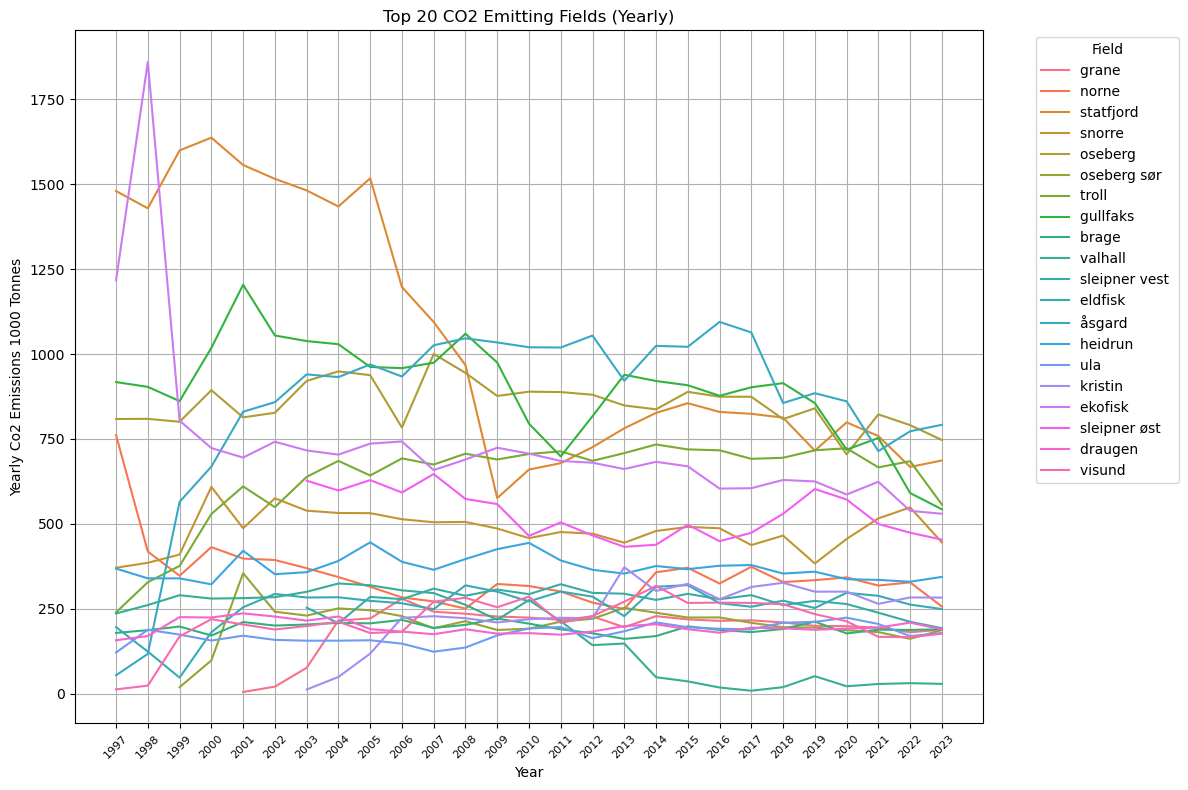

In [77]:
plot_field_values(emissions_df, 'yearly_co2_emissions_1000_tonnes', 'Top 20 CO2 Emitting Fields (Yearly)', top_20_co2_polluting_fields)



Top 10 CO2 Emitting Fields (Yearly)


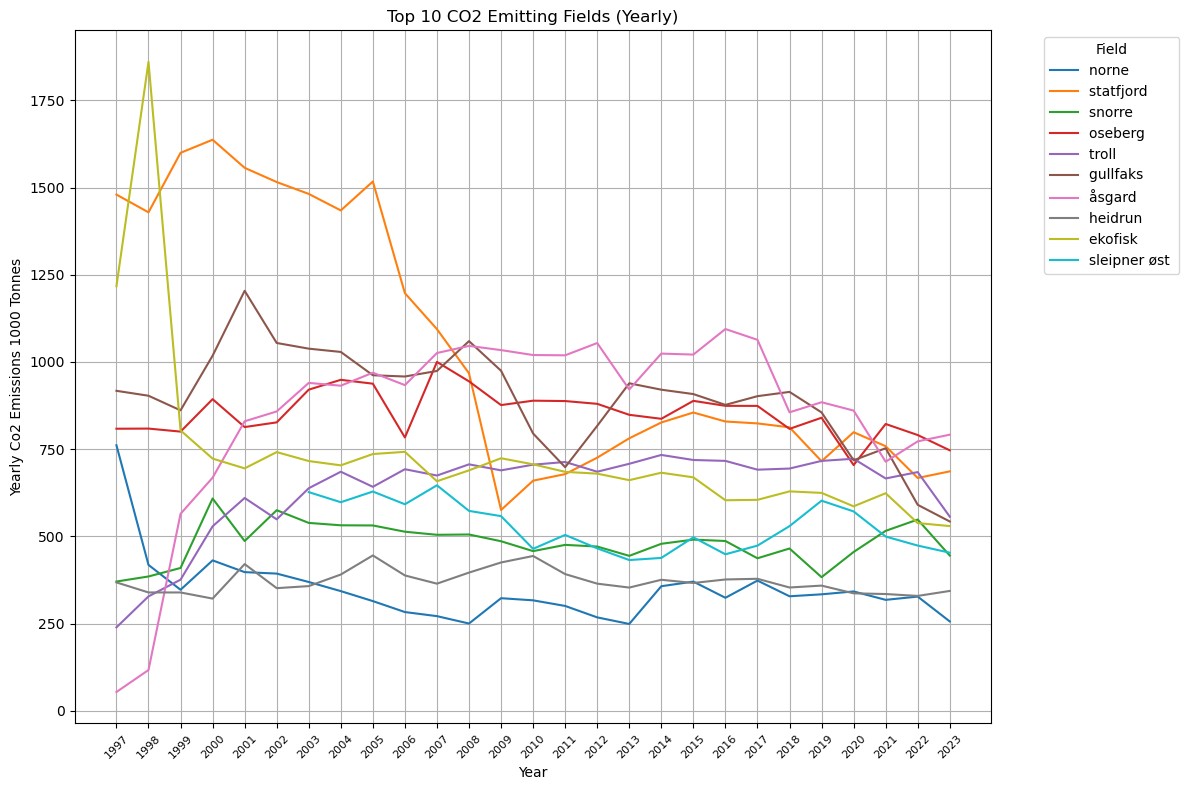

In [78]:
plot_field_values(emissions_df, 'yearly_co2_emissions_1000_tonnes', 'Top 10 CO2 Emitting Fields (Yearly)', top_10_co2_polluting_fields)


Index(['rev ', 'gaupe ', 'yttergryta ', 'skirne ', 'sygna ', 'atla ', 'vale ',
       'hod ', 'vilje ', 'svalin '],
      dtype='object', name='field')


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

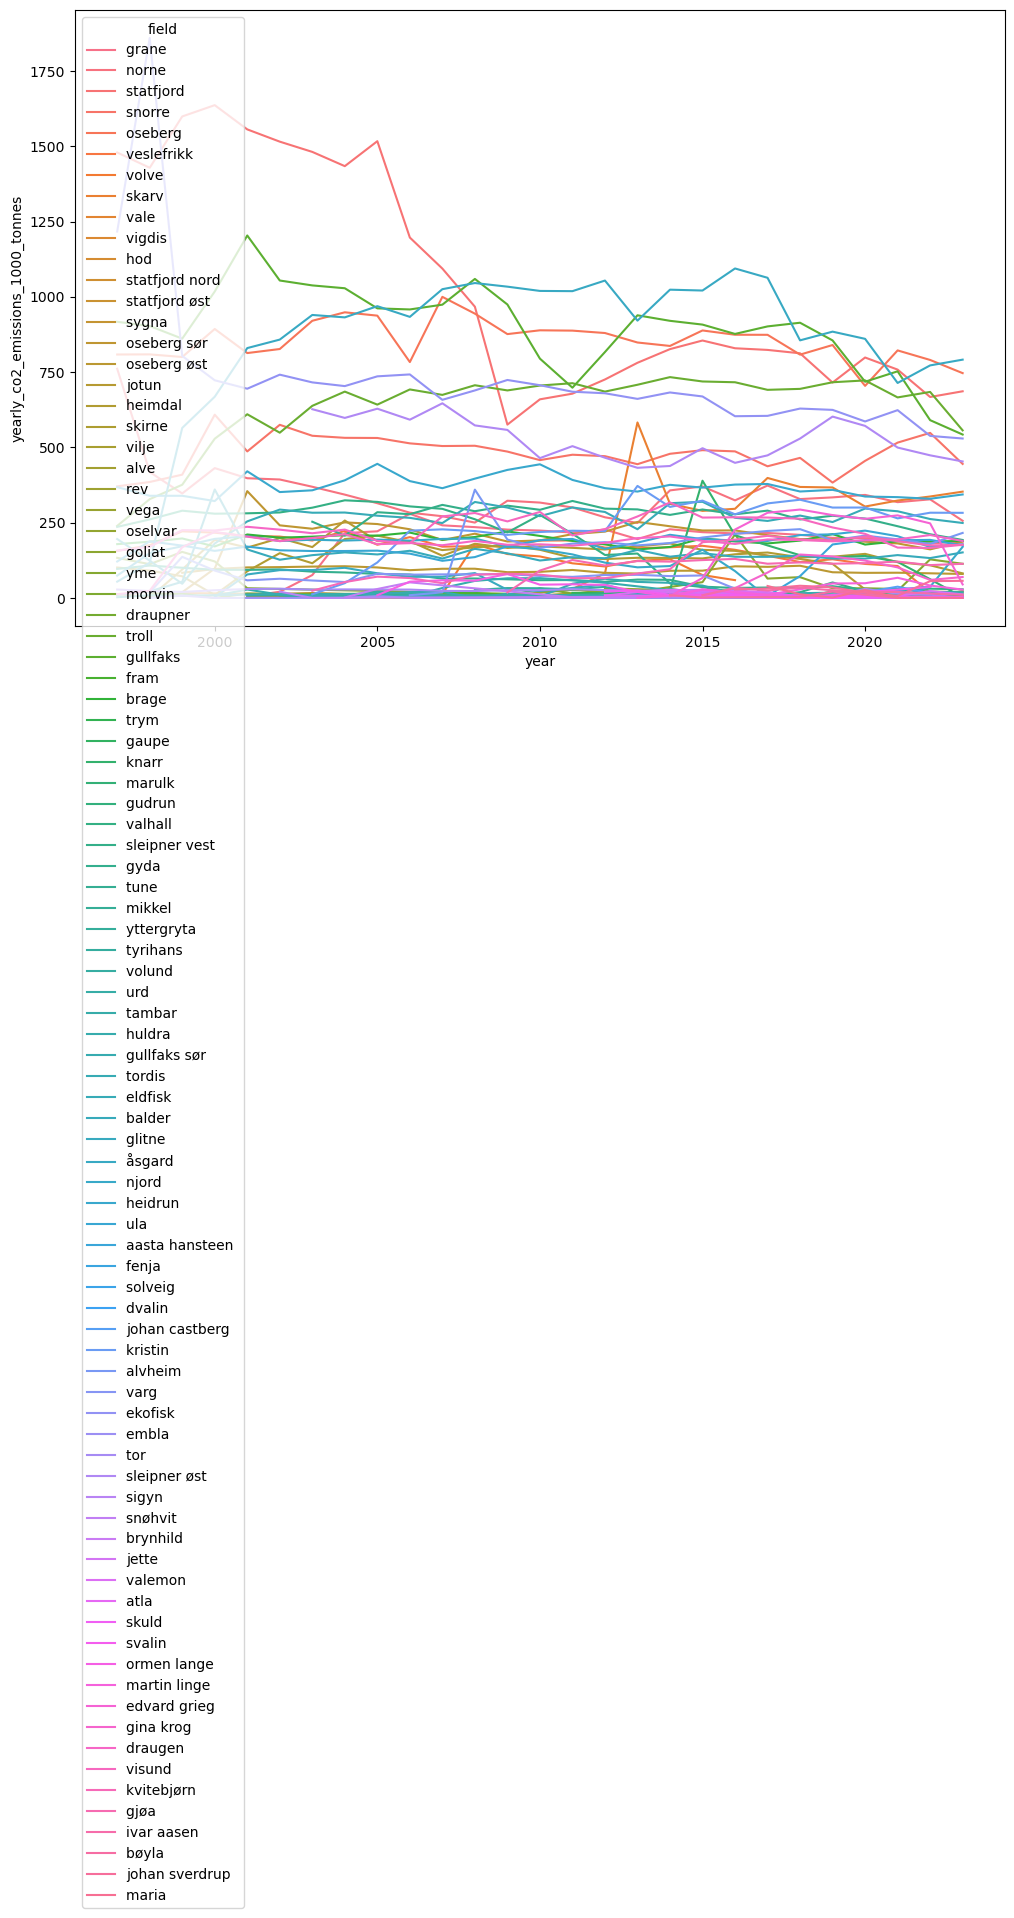

In [79]:
plot_field_values(emissions_df, 'yearly_co2_emissions_1000_tonnes', bottom_10_co2_polluting_fields)


plot_field_values(emissions_df, 'yearly_co2_emissions_1000_tonnes', bottom_20_co2_polluting_fields)
plot_field_values(emissions_df, 'yearly_co2_emissions_1000_tonnes', bottom_30_co2_polluting_fields)


In [ ]:
# Checking the number of yearly_emission_co2_1000_tons observations for each field

co2_obs_per_field = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].count().sort_values(ascending=False)

# Displaying all the fields with less than 8 observations

num_of_obs = 8

co2_obs_per_field[co2_obs_per_field < num_of_obs]
print(co2_obs_per_field[co2_obs_per_field < num_of_obs])

field
tune              7
volund            7
aasta hansteen    7
maria             7
sigyn             7
morvin            7
alve              6
bøyla             5
brynhild          5
yttergryta        4
vilje             4
tambar            4
vega              4
dvalin            3
solveig           3
marulk            3
vale              3
johan castberg    3
jette             2
mikkel            2
svalin            2
atla              2
gaupe             2
oselvar           2
trym              2
skirne            2
fenja             2
rev               1
Name: yearly_co2_emissions_1000_tonnes, dtype: int64


54
Yearly CO2 Emissions for Fields with More than 10 Observations


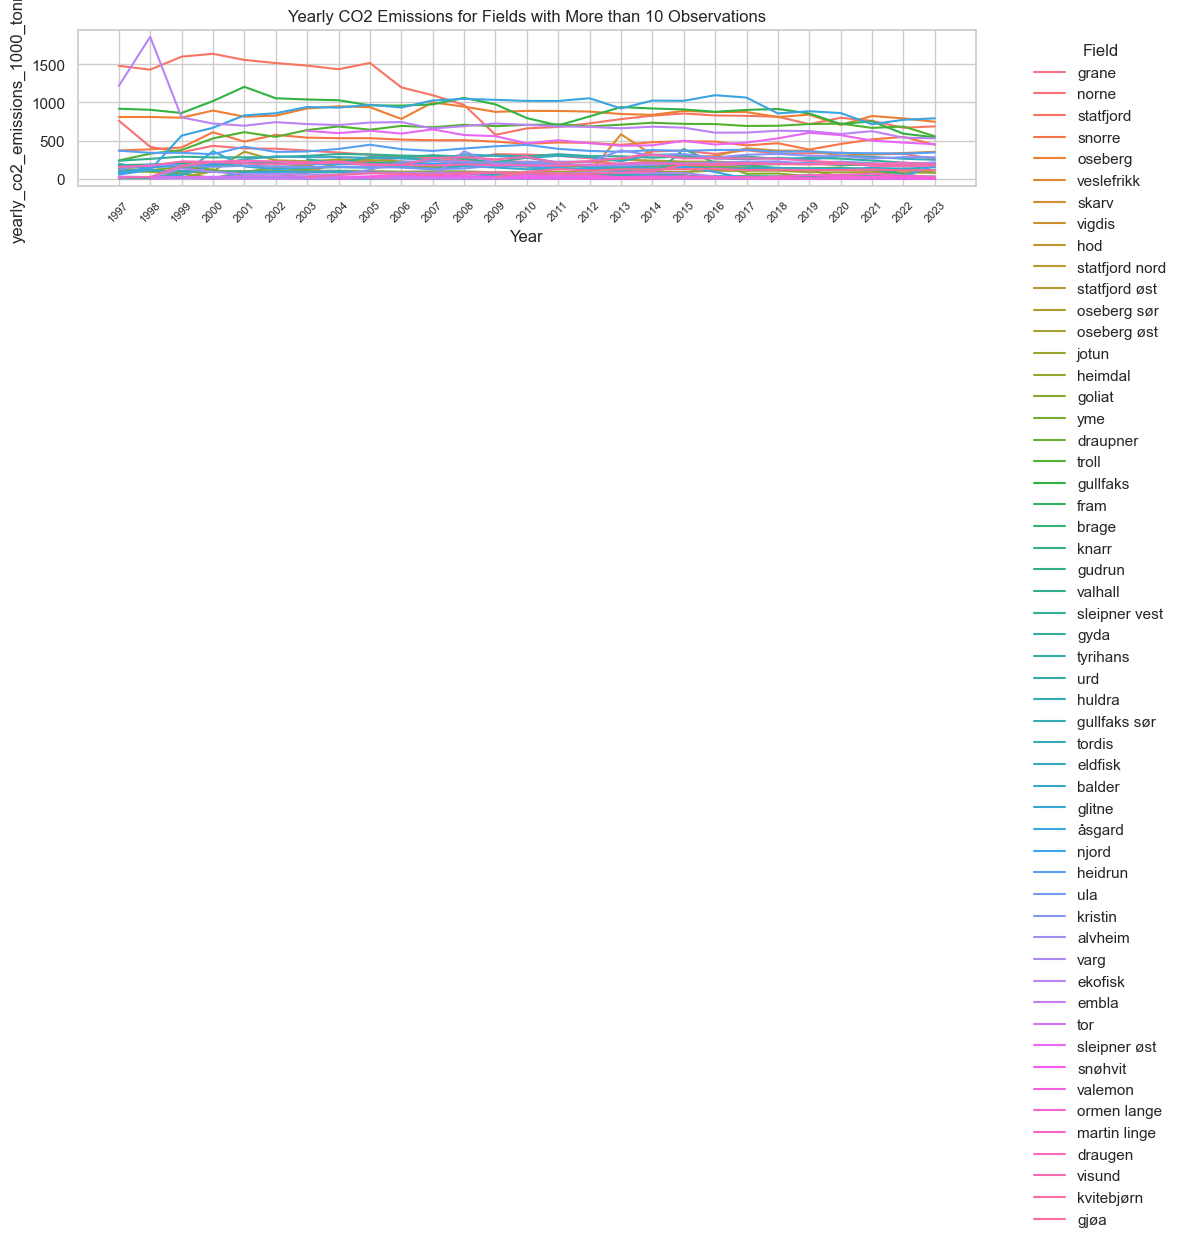

In [ ]:
# Plotting the yearly CO2 emissions for all the fields that has more than 10 observations

fields_with_more_than_10_obs = co2_obs_per_field[co2_obs_per_field > 10].index
print(len(fields_with_more_than_10_obs))
plot_field_values(emissions_df, 'yearly_co2_emissions_1000_tonnes', 'Yearly CO2 Emissions for Fields with More than 10 Observations', fields_with_more_than_10_obs)



In [ ]:
# printing all data about the svalin field, but column is object

emissions_df['field'] = emissions_df['field'].apply(lambda x: str(x).strip().lower() if pd.notnull(x) else x)
emissions_df[emissions_df['field'] == 'svalin']

1,field,year,yearly_ch4_emissions_tons,org_number,yearly_nox_emissions_tons,yearly_water_emissions_m3,yearly_subsea_water_emissions,yearly_oil_spill_emissions_tons,yearly_co2_emissions_1000_tonnes,operator
1103,svalin,2014,0.5,993246298,201.510188,NaN,NaN,NaN,11.681839,equinor energy as
1104,svalin,2023,0.0,993246298,40.527000,874.7,NaN,0.007922,3.002385,equinor energy as


In [ ]:
# Printing the co2 emissions for the field svalin

display(emissions_co2_df)

# Checking datatypes
emissions_co2_df.dtypes


1,field,year,yearly_co2_emissions_1000_tonnes,org_number,operator
2,grane,2022,180.655154,993246298,equinor energy as
3,grane,2023,188.267980,993246298,equinor energy as
4,norne,1997,761.336994,893246592,equinor energy as
5,norne,1998,418.303952,893246592,equinor energy as
6,norne,1999,347.059880,893246592,equinor energy as
...,...,...,...,...,...
1314,aasta hansteen,2018,72.503572,912731456,equinor energy as
1315,aasta hansteen,2019,177.647453,912731456,equinor energy as
1316,aasta hansteen,2020,192.207951,912731456,equinor energy as
1317,aasta hansteen,2021,191.436769,912731456,equinor energy as


1
field                                object
year                                  int64
yearly_co2_emissions_1000_tonnes    float64
org_number                            int64
operator                             object
dtype: object

In [ ]:
total_yearly_co2_emissions = emissions_df.groupby('year')['yearly_co2_emissions_1000_tonnes'].sum()
total_yearly_co2_emissions

# Setting the yearly_co2_emissions_1000_tonnes as a column name for the total_yearly_co2_emissions df

total_yearly_co2_emissions = total_yearly_co2_emissions.reset_index()
total_yearly_co2_emissions



,year,yearly_co2_emissions_1000_tonnes
0,1997,7731.721217
1,1998,8268.503038
2,1999,8374.042935
3,2000,9573.888420
4,2001,10004.184362
5,2002,9819.142275
6,2003,10842.896541
7,2004,11235.153537
8,2005,11349.129521
9,2006,10914.894036


/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_65404/1584691247.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='year', y=column, hue=hue, palette='Blues')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


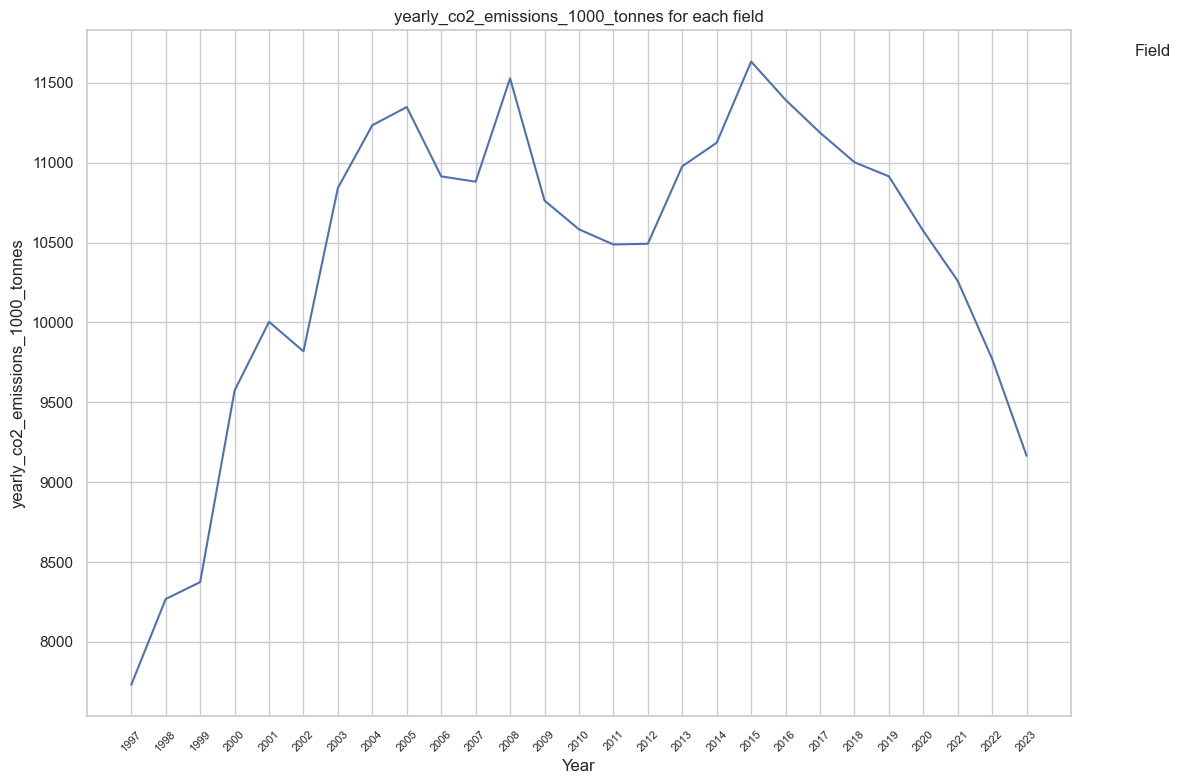

In [ ]:

# Plot the total yearly CO2 emissions using the function

plot_field_values(total_yearly_co2_emissions, 'yearly_co2_emissions_1000_tonnes')



In [ ]:
# Finding the drivers for the rapid decline in CO2 emissions from 2000 and onwards




/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_65404/2722517796.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


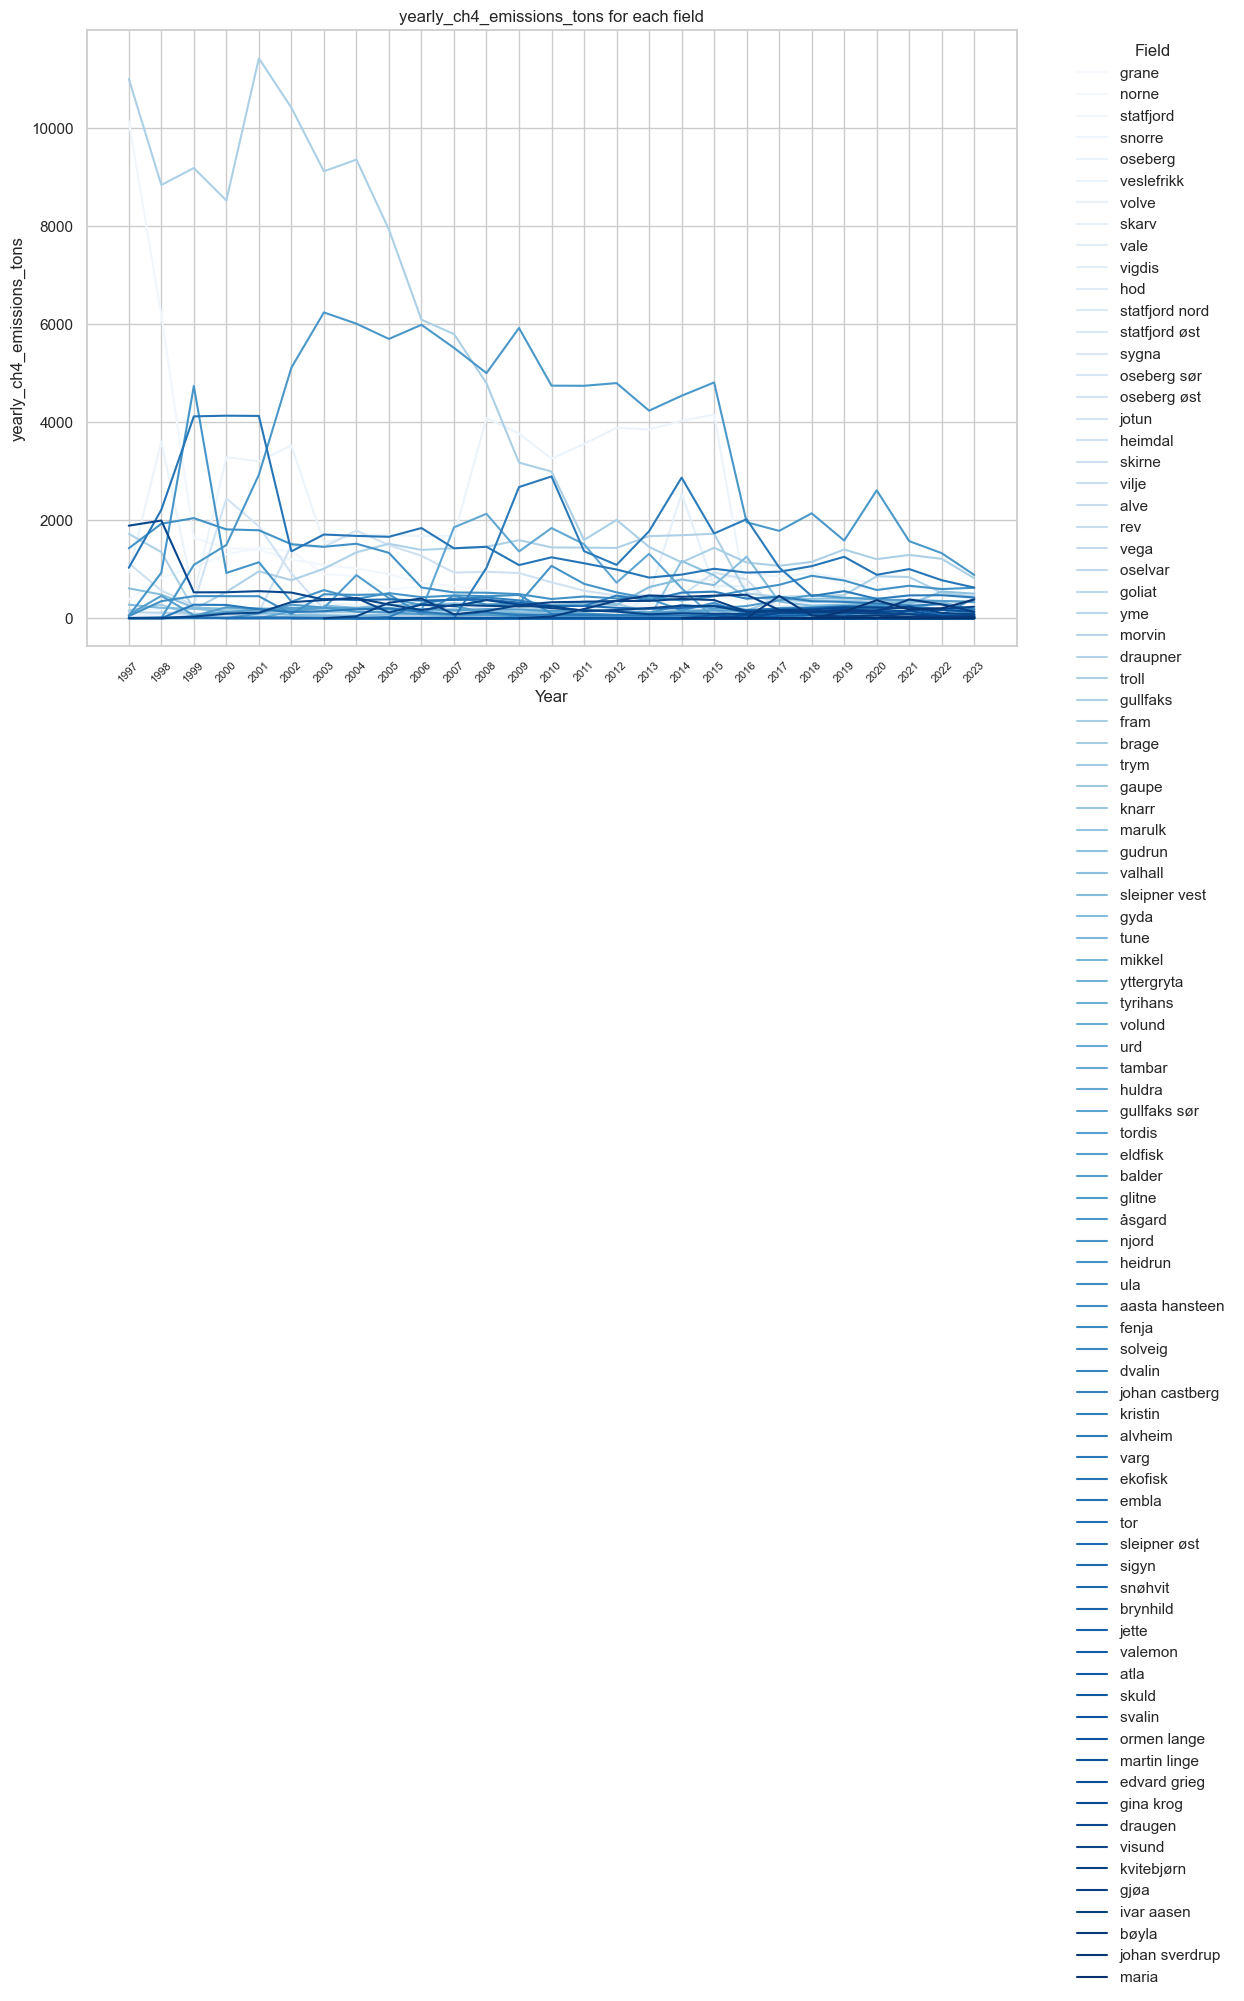

In [ ]:
plot_field_values(emissions_df, 'yearly_ch4_emissions_tons')


In [ ]:
# Printing the data for tyrving field